In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    roc_auc_score,
    confusion_matrix
)

from imblearn.over_sampling import SMOTE

# Cargo los datos
df = '/content/drive/MyDrive/heart_2022_no_nans.csv'
df = pd.read_csv(df)

# Muestro todas las columnas con las primeros 5 filas
print(df.head().to_markdown())



|    | State   | Sex    | GeneralHealth   |   PhysicalHealthDays |   MentalHealthDays | LastCheckupTime                                    | PhysicalActivities   |   SleepHours | RemovedTeeth           | HadHeartAttack   | HadAngina   | HadStroke   | HadAsthma   | HadSkinCancer   | HadCOPD   | HadDepressiveDisorder   | HadKidneyDisease   | HadArthritis   | HadDiabetes   | DeafOrHardOfHearing   | BlindOrVisionDifficulty   | DifficultyConcentrating   | DifficultyWalking   | DifficultyDressingBathing   | DifficultyErrands   | SmokerStatus   | ECigaretteUsage                           | ChestScan   | RaceEthnicityCategory    | AgeCategory     |   HeightInMeters |   WeightInKilograms |   BMI | AlcoholDrinkers   | HIVTesting   | FluVaxLast12   | PneumoVaxEver   | TetanusLast10Tdap                                         | HighRiskLastYear   | CovidPos   |
|---:|:--------|:-------|:----------------|---------------------:|-------------------:|:--------------------------------------------------

In [ ]:
# Muestro las columnas:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [ ]:
# Imprimo los datos estadisticos de las columnas
print(df.describe())

# Investigar el porque de la gente que duerme 24 hs

       PhysicalHealthDays  MentalHealthDays     SleepHours  HeightInMeters  \
count       246022.000000     246022.000000  246022.000000   246022.000000   
mean             4.119026          4.167140       7.021331        1.705150   
std              8.405844          8.102687       1.440681        0.106654   
min              0.000000          0.000000       1.000000        0.910000   
25%              0.000000          0.000000       6.000000        1.630000   
50%              0.000000          0.000000       7.000000        1.700000   
75%              3.000000          4.000000       8.000000        1.780000   
max             30.000000         30.000000      24.000000        2.410000   

       WeightInKilograms            BMI  
count      246022.000000  246022.000000  
mean           83.615179      28.668136  
std            21.323156       6.513973  
min            28.120000      12.020000  
25%            68.040000      24.270000  
50%            81.650000      27.460000  
75%

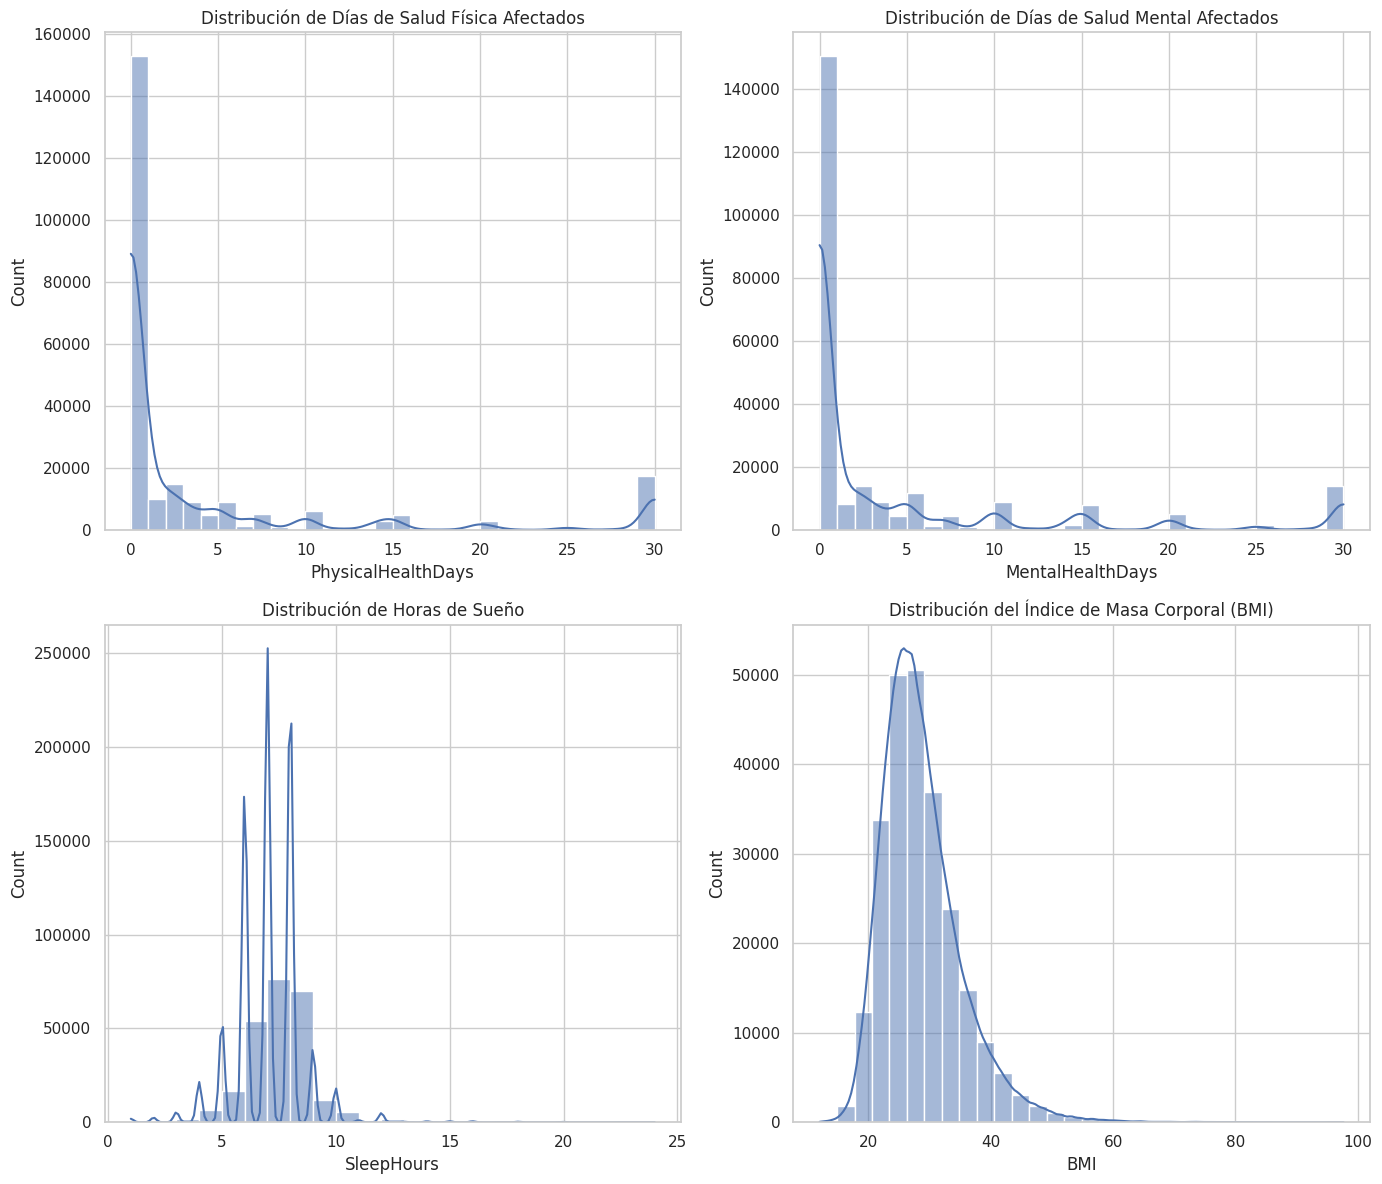

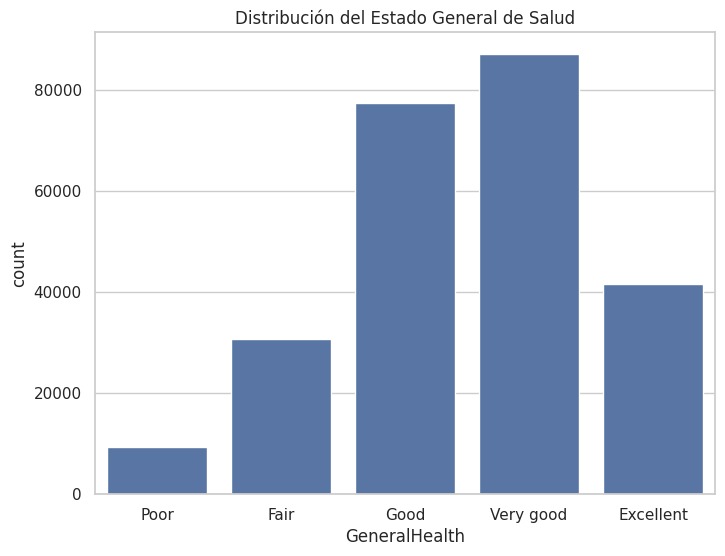

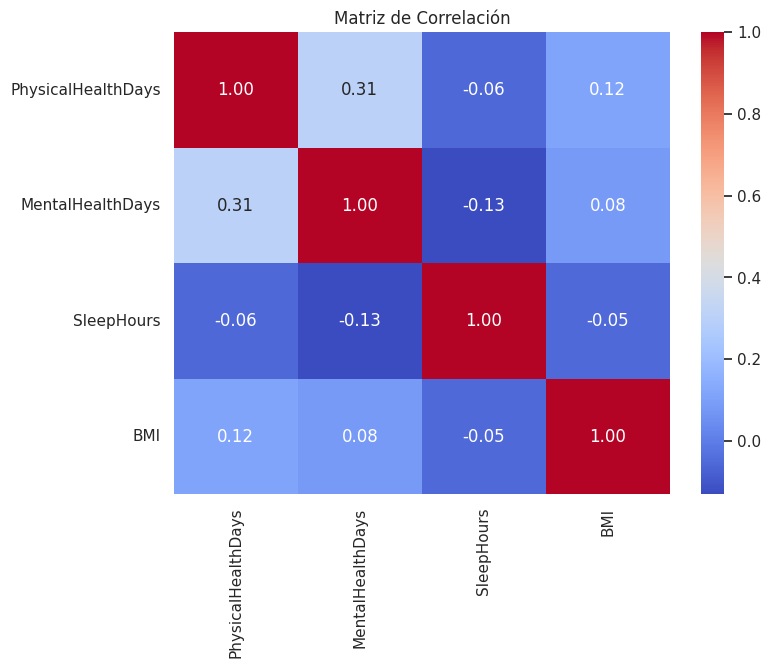

In [ ]:
# Configuración de estilos de los gráficos
sns.set(style="whitegrid")

# Crear un grid de figuras para múltiples plots
fig, ax = plt.subplots(2, 2, figsize=(14, 12))

# Histogramas
sns.histplot(df['PhysicalHealthDays'], bins=30, kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Distribución de Días de Salud Física Afectados')

sns.histplot(df['MentalHealthDays'], bins=30, kde=True, ax=ax[0, 1])
ax[0, 1].set_title('Distribución de Días de Salud Mental Afectados')

sns.histplot(df['SleepHours'], bins=23, kde=True, ax=ax[1, 0])
ax[1, 0].set_title('Distribución de Horas de Sueño')

sns.histplot(df['BMI'], bins=30, kde=True, ax=ax[1, 1])
ax[1, 1].set_title('Distribución del Índice de Masa Corporal (BMI)')

plt.tight_layout()

# Mostrar los gráficos
plt.show()

# Diagrama de barras para GeneralHealth
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='GeneralHealth', order=['Poor', 'Fair', 'Good', 'Very good', 'Excellent'])
plt.title('Distribución del Estado General de Salud')
plt.show()

# Matriz de correlación
correlation_matrix = df[['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'BMI']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


Aquí están las visualizaciones basadas en los datos proporcionados:

Distribución de Días de Salud Física y Mental Afectados:
La mayoría de las personas reportan pocos o ningún día afectado por problemas de salud física o mental, pero hay una cola larga que indica que una minoría experimenta muchos días afectados, lo que podría indicar condiciones crónicas o episodios severos de enfermedad.


Distribución de Horas de Sueño:
La mayoría de las personas duermen entre 6 y 8 horas por noche, lo cual es típico, pero hay notables cantidades de personas que duermen menos de 6 o más de 8 horas, lo que puede tener implicaciones de salud importantes.
Distribución del Índice de Masa Corporal (BMI):
El BMI muestra una distribución centrada alrededor de valores que clasifican a las personas en las categorías de sobrepeso (25-30) y obeso (mayor a 30). Esta es una señal de alerta para posibles problemas de salud asociados con el peso.

Estado General de Salud:
Hay más personas que reportan un estado de salud "Muy bueno" o "Bueno", pero un número significativo de personas aún reporta "Regular" o "Malo", destacando la variabilidad en las percepciones de salud.
Matriz de Correlación:
Hay una correlación positiva entre los días afectados por salud física y mental, lo que podría indicar que los problemas en una área tienden a coincidir o influir en la otra.

El BMI tiene una correlación muy baja con las otras variables, lo que sugiere que, por sí solo, el BMI no indica directamente más días de enfermedad o patrones de sueño.



Relación entre salud física y mental: El vínculo entre días afectados de salud física y mental puede ser un área para una investigación más profunda, explorando si intervenciones que apuntan a una podrían beneficiar la otra.

Calidad del sueño: Investigar más sobre las causas de variaciones en las horas de sueño podría ofrecer caminos para mejorar la salud general de la población, dado el impacto del sueño en la salud física y mental.

<ipython-input-14-1bc7a66e2b75>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sleep_health_group.index, y=sleep_health_group.values, palette='viridis')


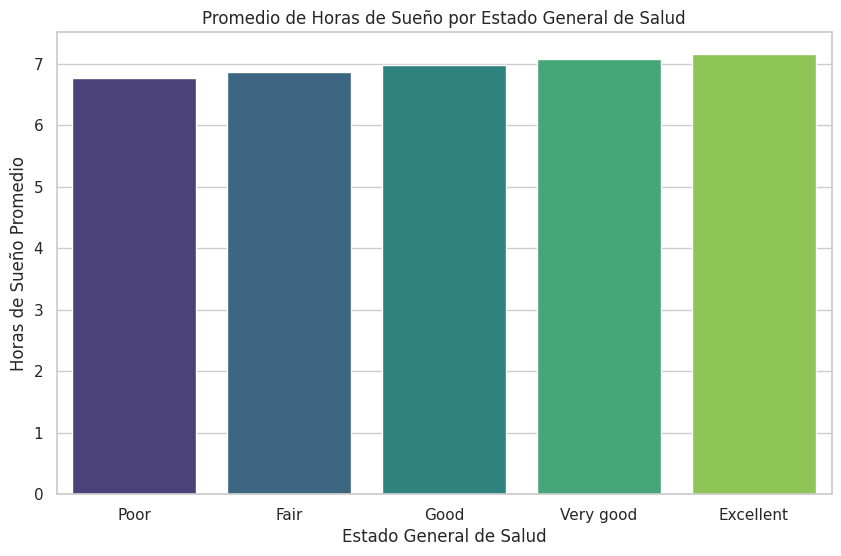

In [ ]:
# Preparando los datos para comparar las horas de sueño entre diferentes estados de salud general
sleep_health_group = df.groupby('GeneralHealth')['SleepHours'].mean().sort_values()

# Análisis de correlación entre SleepHours y PhysicalHealthDays, MentalHealthDays
sleep_physical_corr = df['SleepHours'].corr(df['PhysicalHealthDays'])
sleep_mental_corr = df['SleepHours'].corr(df['MentalHealthDays'])

# Gráfico de las horas de sueño promedio por estado general de salud
plt.figure(figsize=(10, 6))
sns.barplot(x=sleep_health_group.index, y=sleep_health_group.values, palette='viridis')
plt.title('Promedio de Horas de Sueño por Estado General de Salud')
plt.xlabel('Estado General de Salud')
plt.ylabel('Horas de Sueño Promedio')
plt.show()



In [ ]:
# 1. Correlación de horas de sueño con días de salud física y mental afectados
correlations = df[['SleepHours', 'PhysicalHealthDays', 'MentalHealthDays']].corr()

correlations


,SleepHours,PhysicalHealthDays,MentalHealthDays
SleepHours,1.000000,-0.056063,-0.1301
PhysicalHealthDays,-0.056063,1.000000,0.3068
MentalHealthDays,-0.130100,0.306800,1.0000


<ipython-input-16-9993dfec3971>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sleep_activity_group.index, y=sleep_activity_group.values, palette='viridis')
<ipython-input-16-9993dfec3971>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sleep_smoker_group.index, y=sleep_smoker_group.values, palette='viridis')


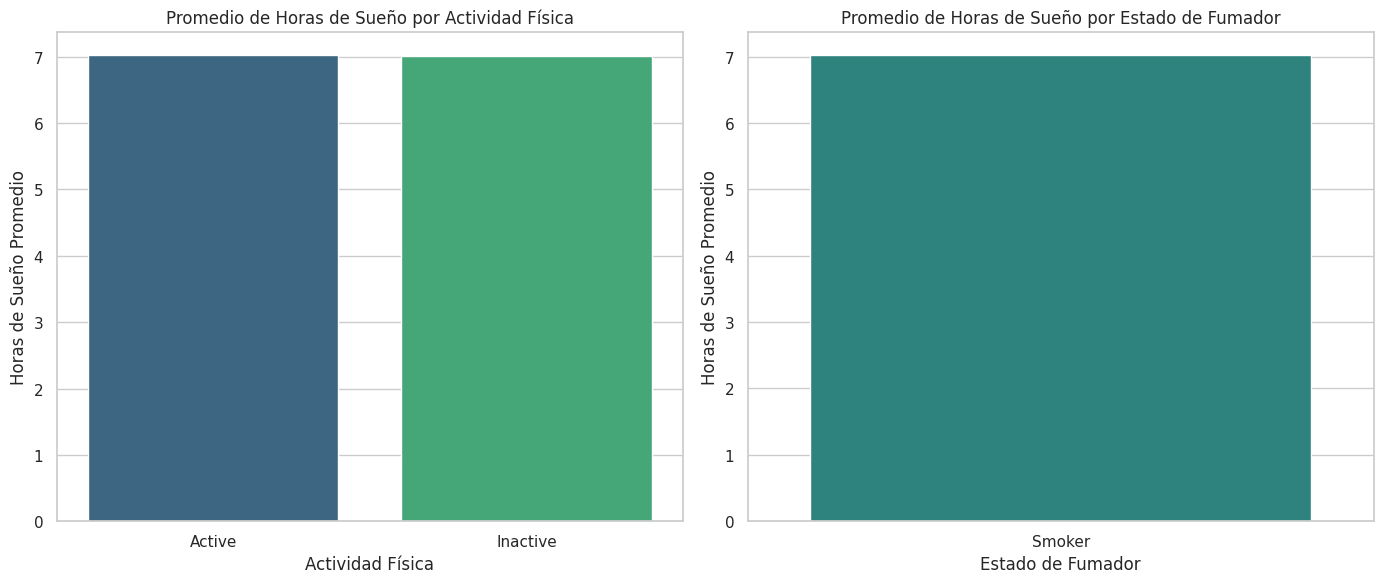

(PhysicalActivities
 Active      7.023788
 Inactive    7.012741
 Name: SleepHours, dtype: float64,
 SmokerStatus
 Smoker    7.021331
 Name: SleepHours, dtype: float64)

In [ ]:

df['PhysicalActivities'] = df['PhysicalActivities'].map({'Yes': 'Active', 'No': 'Inactive'})
df['SmokerStatus'] = df['SmokerStatus'].apply(lambda x: 'Non-Smoker' if x == 'Never' else 'Smoker')

sleep_activity_group = df.groupby('PhysicalActivities')['SleepHours'].mean()
sleep_smoker_group = df.groupby('SmokerStatus')['SleepHours'].mean()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=sleep_activity_group.index, y=sleep_activity_group.values, palette='viridis')
plt.title('Promedio de Horas de Sueño por Actividad Física')
plt.ylabel('Horas de Sueño Promedio')
plt.xlabel('Actividad Física')

plt.subplot(1, 2, 2)
sns.barplot(x=sleep_smoker_group.index, y=sleep_smoker_group.values, palette='viridis')
plt.title('Promedio de Horas de Sueño por Estado de Fumador')
plt.ylabel('Horas de Sueño Promedio')
plt.xlabel('Estado de Fumador')

plt.tight_layout()
plt.show()

sleep_activity_group, sleep_smoker_group


<ipython-input-17-056f0188dbc7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sleep_age_group.index, y=sleep_age_group.values, palette='viridis')


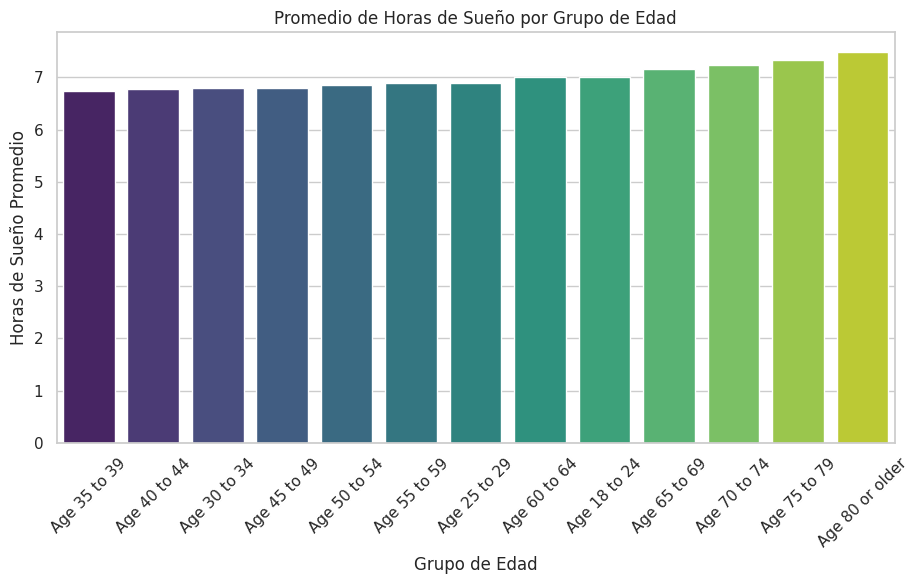

AgeCategory
Age 35 to 39       6.741514
Age 40 to 44       6.778177
Age 30 to 34       6.795744
Age 45 to 49       6.797171
Age 50 to 54       6.846482
Age 55 to 59       6.887374
Age 25 to 29       6.900261
Age 60 to 64       7.003293
Age 18 to 24       7.008078
Age 65 to 69       7.155864
Age 70 to 74       7.244143
Age 75 to 79       7.341310
Age 80 or older    7.489560
Name: SleepHours, dtype: float64

In [ ]:

sleep_age_group = df.groupby('AgeCategory')['SleepHours'].mean().sort_values()
sleep_health_group = df.groupby('GeneralHealth')['SleepHours'].mean().sort_values()

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=sleep_age_group.index, y=sleep_age_group.values, palette='viridis')
plt.title('Promedio de Horas de Sueño por Grupo de Edad')
plt.xticks(rotation=45)
plt.ylabel('Horas de Sueño Promedio')
plt.xlabel('Grupo de Edad')

plt.tight_layout()
plt.show()

sleep_age_group


Grupos de Edad:
Las horas de sueño promedio aumentan con la edad. Los más jóvenes (35 a 39 años) duermen menos, con un promedio de
6.74
6.74 horas, mientras que los mayores de 80 años duermen más, con un promedio de
7.49
7.49 horas.
Este incremento podría deberse a cambios en los patrones de vida, como menos obligaciones laborales o diferencias en la salud física y mental.
Estado General de Salud:
Existe una tendencia clara donde las personas con mejor estado de salud general reportan más horas de sueño. Aquellos que reportan un estado de salud "Excelente" duermen en promedio
7.16
7.16 horas, mientras que los que tienen un estado "Pobre" duermen en promedio
6.78
6.78 horas.
Esta relación sugiere que una mejor salud general puede estar asociada con mejores patrones de sueño, o viceversa.

<ipython-input-18-e745014079f6>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SleepHours', y='Condition', data=sleep_by_condition, palette='viridis')


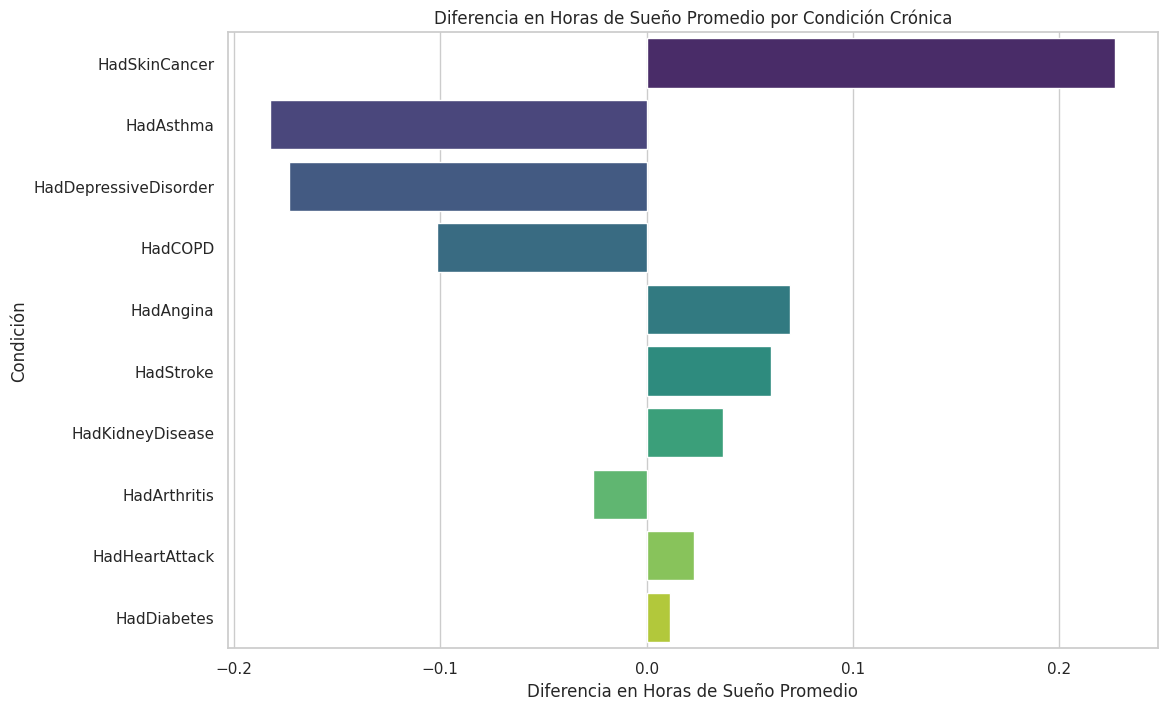

               Condition  SleepHours
4          HadSkinCancer    0.227132
3              HadAsthma   -0.182452
6  HadDepressiveDisorder   -0.173258
5                HadCOPD   -0.101678
1              HadAngina    0.069568
2              HadStroke    0.060466
7       HadKidneyDisease    0.036994
8           HadArthritis   -0.025895
0         HadHeartAttack    0.023022
9            HadDiabetes    0.011424


In [ ]:
# Mapeo las variables.
df['HadDiabetes'] = df['HadDiabetes'].replace({
    'No': 0, 'Yes': 1,
    'Yes, but only during pregnancy (female)': 1,
    'No, pre-diabetes or borderline diabetes': 0
})

# Lista de condiciones crónicas a evaluar
chronic_conditions = [
    'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer',
    'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes'
]

# Creando un DataFrame para almacenar los resultados de las horas de sueño promedio por condición
sleep_by_condition = pd.DataFrame()

for condition in chronic_conditions:
    # Calculando el promedio de horas de sueño para aquellos con y sin la condición (adaptado para números)
    condition_mean_sleep = df.groupby(condition)['SleepHours'].mean()
    temp_df = pd.DataFrame({
        'Condition': [condition],
        'SleepHours': [condition_mean_sleep[1] - condition_mean_sleep[0]]
    })
    sleep_by_condition = pd.concat([sleep_by_condition, temp_df], ignore_index=True)

# Ordenando los resultados por diferencia de horas de sueño
sleep_by_condition.sort_values(by='SleepHours', key=abs, ascending=False, inplace=True)

# Visualizando las diferencias en horas de sueño promedio por condición crónica en un gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='SleepHours', y='Condition', data=sleep_by_condition, palette='viridis')
plt.title('Diferencia en Horas de Sueño Promedio por Condición Crónica')
plt.xlabel('Diferencia en Horas de Sueño Promedio')
plt.ylabel('Condición')
plt.show()

print(sleep_by_condition)


In [ ]:
# Seleccionamos las columnas relevantes para analizar la correlación con las horas de sueño
health_columns = [
    'SleepHours',
    'HadHeartAttack',
    'HadAngina',
    'HadStroke',
    'HadAsthma',
    'HadSkinCancer',
    'HadCOPD',
    'HadDepressiveDisorder',
    'HadKidneyDisease',
    'HadArthritis',
    'HadDiabetes'
]

df_health = df[health_columns]
df_health = df_health.replace({'No': 0, 'Yes': 1})

correlation_health_sleep = df_health.corr()

correlation_health_sleep


,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes
SleepHours,1.000000,0.003631,0.011537,0.008332,-0.045031,0.044071,-0.018838,-0.048616,0.005372,-0.008545,0.002796
HadHeartAttack,0.003631,1.000000,0.445903,0.177137,0.023756,0.049408,0.133223,0.023706,0.109355,0.117773,0.139784
HadAngina,0.011537,0.445903,1.000000,0.151883,0.034391,0.077616,0.153960,0.028506,0.144688,0.145865,0.148283
HadStroke,0.008332,0.177137,0.151883,1.000000,0.037807,0.039477,0.106723,0.042970,0.091237,0.100186,0.106128
HadAsthma,-0.045031,0.023756,0.034391,0.037807,1.000000,-0.001970,0.199268,0.149901,0.036971,0.093800,0.047789
HadSkinCancer,0.044071,0.049408,0.077616,0.039477,-0.001970,1.000000,0.041570,-0.014573,0.059488,0.121839,0.024349
HadCOPD,-0.018838,0.133223,0.153960,0.106723,0.199268,0.041570,1.000000,0.118282,0.088725,0.174864,0.097881
HadDepressiveDisorder,-0.048616,0.023706,0.028506,0.042970,0.149901,-0.014573,0.118282,1.000000,0.051875,0.118066,0.048216
HadKidneyDisease,0.005372,0.109355,0.144688,0.091237,0.036971,0.059488,0.088725,0.051875,1.000000,0.129028,0.161137
HadArthritis,-0.008545,0.117773,0.145865,0.100186,0.093800,0.121839,0.174864,0.118066,0.129028,1.000000,0.148203


In [ ]:
df['HadHeartAttack'] = df['HadHeartAttack'].map({'Yes': 1, 'No': 0})

heart_attack_summary = df['HadHeartAttack'].describe()

correlations = df.corr()['HadHeartAttack'].sort_values()

heart_attack_summary, correlations


ValueError: could not convert string to float: 'Alabama'

<ipython-input-25-69e3e3f31641>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=var, y='HadHeartAttack', data=df, ax=ax, ci=None)
<ipython-input-25-69e3e3f31641>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=var, y='HadHeartAttack', data=df, ax=ax, ci=None)
<ipython-input-25-69e3e3f31641>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=var, y='HadHeartAttack', data=df, ax=ax, ci=None)
<ipython-input-25-69e3e3f31641>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=var, y='HadHeartAttack', data=df, ax=ax, ci=None)


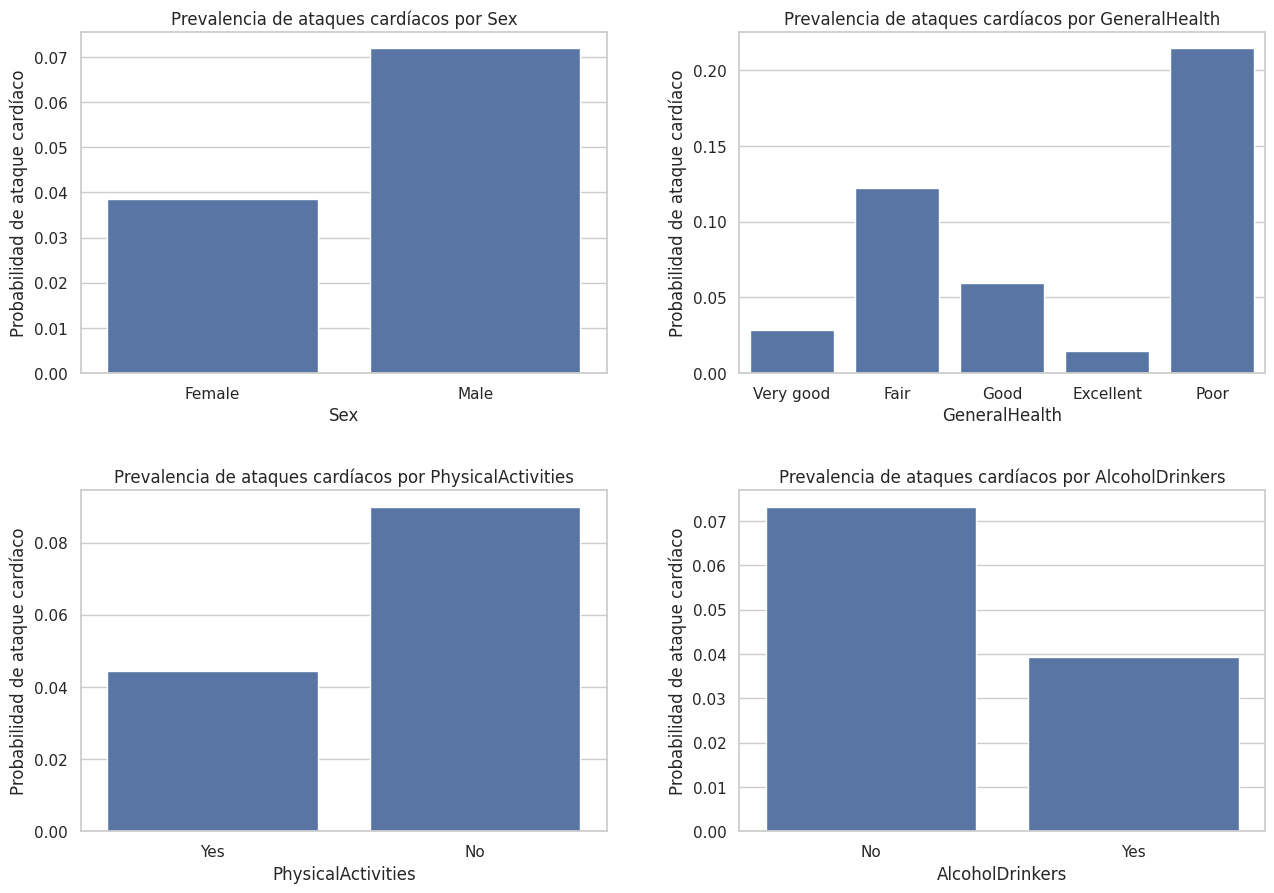

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_vars = ['Sex', 'GeneralHealth', 'PhysicalActivities', 'AlcoholDrinkers']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.tight_layout(pad=5.0)

for i, var in enumerate(categorical_vars):
    ax = axes[i//2, i%2]
    sns.barplot(x=var, y='HadHeartAttack', data=df, ax=ax, ci=None)
    ax.set_title(f'Prevalencia de ataques cardíacos por {var}')
    ax.set_ylabel('Probabilidad de ataque cardíaco')
    ax.set_xlabel(var)

plt.show()


<ipython-input-26-f54db7b46410>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='AgeCategory', y='HadHeartAttack', hue='Sex', data=df, ci=None)


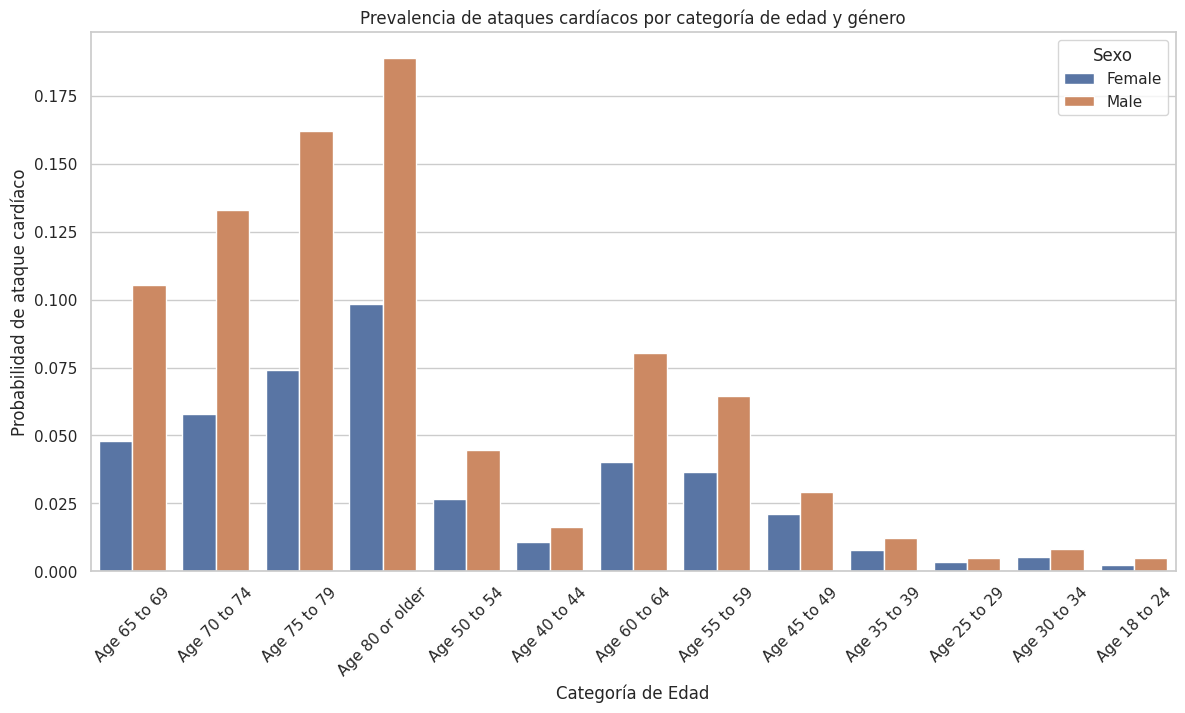

In [ ]:
plt.figure(figsize=(14, 7))
sns.barplot(x='AgeCategory', y='HadHeartAttack', hue='Sex', data=df, ci=None)
plt.title('Prevalencia de ataques cardíacos por categoría de edad y género')
plt.xlabel('Categoría de Edad')
plt.ylabel('Probabilidad de ataque cardíaco')
plt.xticks(rotation=45)
plt.legend(title='Sexo')
plt.show()


<ipython-input-29-2748fee5e889>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='AgeCategory', y='HadHeartAttack', hue='Sex', data=df, ci=None, order=age_order)


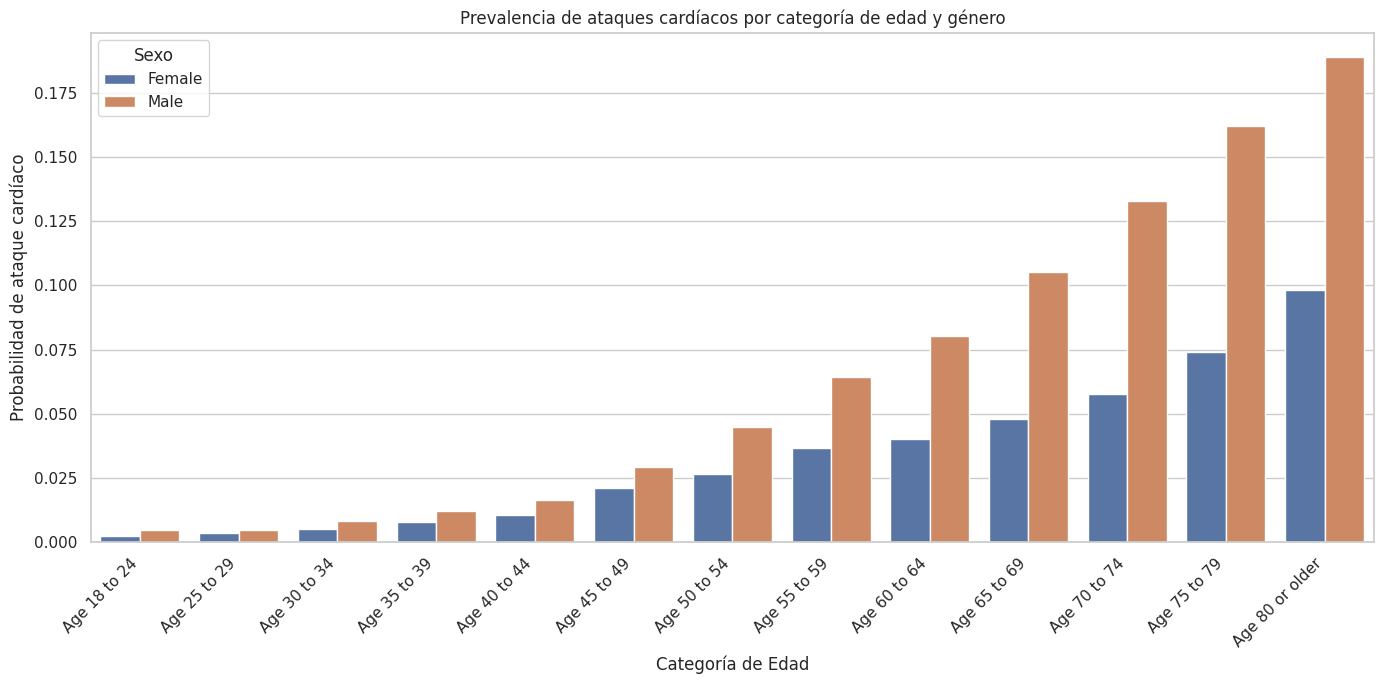

In [ ]:
age_order = ['Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39', 'Age 40 to 44',
                      'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59', 'Age 60 to 64', 'Age 65 to 69',
                      'Age 70 to 74', 'Age 75 to 79', 'Age 80 or older']


# Convert 'HadHeartAttack' to numeric
df['HadHeartAttack'] = (df['HadHeartAttack'] == 'Yes').astype(int)

# Create the plot
plt.figure(figsize=(14, 7))
sns.barplot(x='AgeCategory', y='HadHeartAttack', hue='Sex', data=df, ci=None, order=age_order)
plt.title('Prevalencia de ataques cardíacos por categoría de edad y género')
plt.xlabel('Categoría de Edad')
plt.ylabel('Probabilidad de ataque cardíaco')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()



<ipython-input-32-55173d7923bd>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(y='AgeCategory', x='HadHeartAttack', hue='Sex', data=df, ci=None, order=age_order)


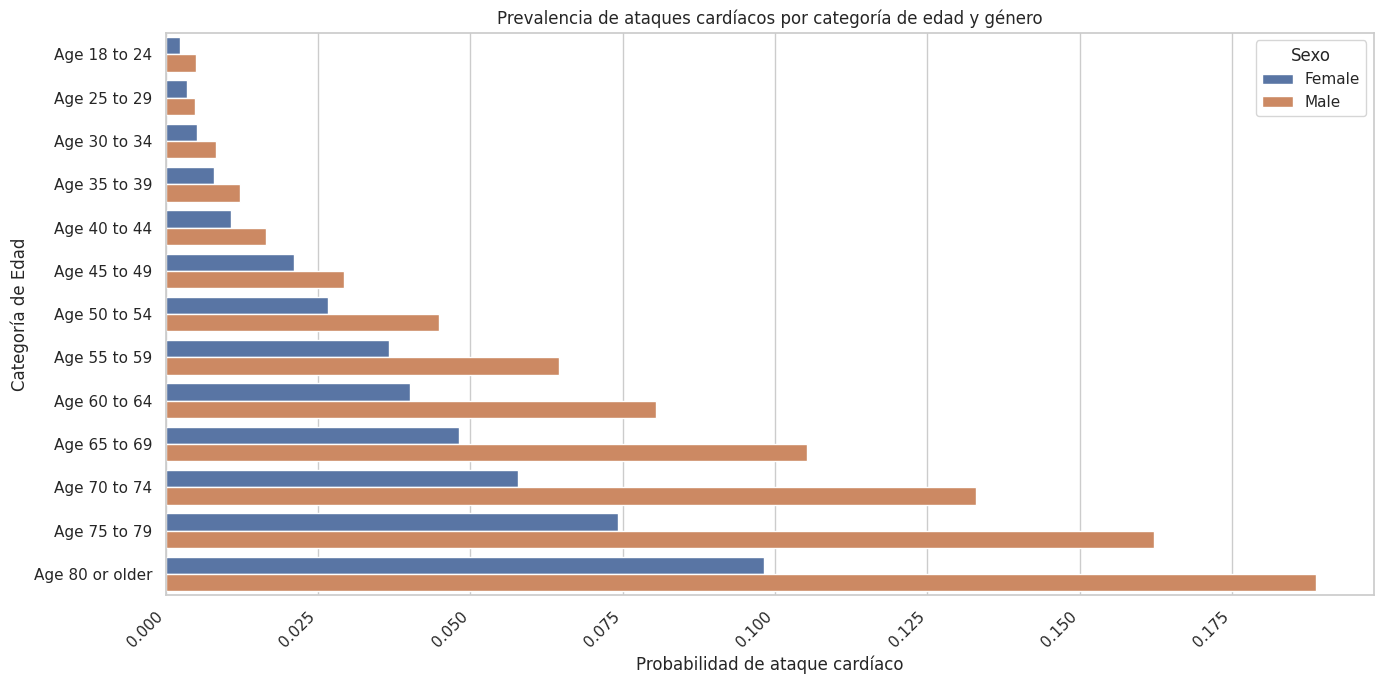

In [ ]:
# Crear un orden personalizado para las categorías de edad
age_order = ['Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39', 'Age 40 to 44',
             'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59', 'Age 60 to 64', 'Age 65 to 69',
             'Age 70 to 74', 'Age 75 to 79', 'Age 80 or older']

# Convertir 'HadHeartAttack' a numérico
df['HadHeartAttack'] = (df['HadHeartAttack'] == 'Yes').astype(int)

# Crear el gráfico horizontal
plt.figure(figsize=(14, 7))
sns.barplot(y='AgeCategory', x='HadHeartAttack', hue='Sex', data=df, ci=None, order=age_order)
plt.title('Prevalencia de ataques cardíacos por categoría de edad y género')
plt.ylabel('Categoría de Edad')
plt.xlabel('Probabilidad de ataque cardíaco')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()



<ipython-input-35-aeaddc871777>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(y='AgeCategory', x='HadHeartAttack', hue='Sex', data=df, ci=None, order=age_order)


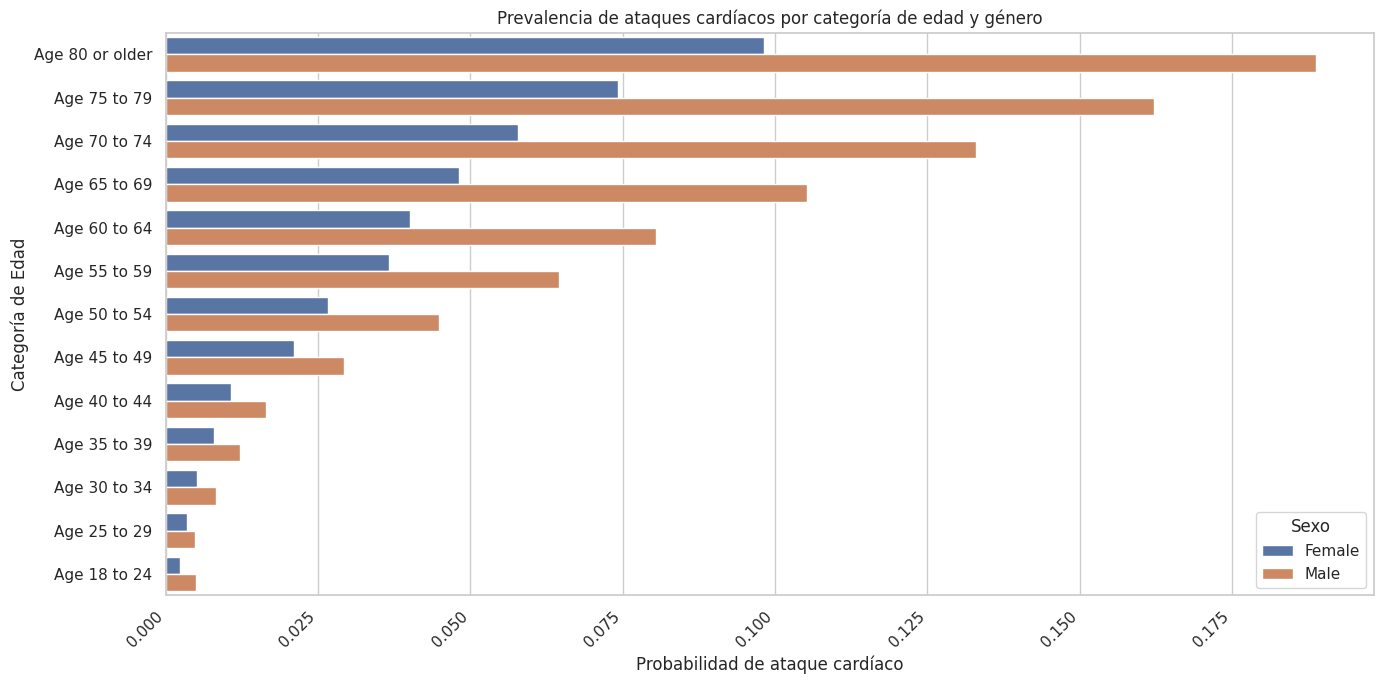

Gráfico horizontal generado exitosamente.


In [ ]:
age_order = ['Age 80 or older', 'Age 75 to 79', 'Age 70 to 74', 'Age 65 to 69', 'Age 60 to 64',
             'Age 55 to 59', 'Age 50 to 54', 'Age 45 to 49', 'Age 40 to 44', 'Age 35 to 39',
             'Age 30 to 34', 'Age 25 to 29', 'Age 18 to 24']

# Convertir 'HadHeartAttack' a numérico
df['HadHeartAttack'] = (df['HadHeartAttack'] == 'Yes').astype(int)

# Crear el gráfico horizontal
plt.figure(figsize=(14, 7))
sns.barplot(y='AgeCategory', x='HadHeartAttack', hue='Sex', data=df, ci=None, order=age_order)
plt.title('Prevalencia de ataques cardíacos por categoría de edad y género')
plt.ylabel('Categoría de Edad')
plt.xlabel('Probabilidad de ataque cardíaco')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()

print('Gráfico horizontal generado exitosamente.')


<ipython-input-39-cf62cb94434e>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(y=state_heart_attack_rates.index, x=state_heart_attack_rates.values, orient='h', ci=None)


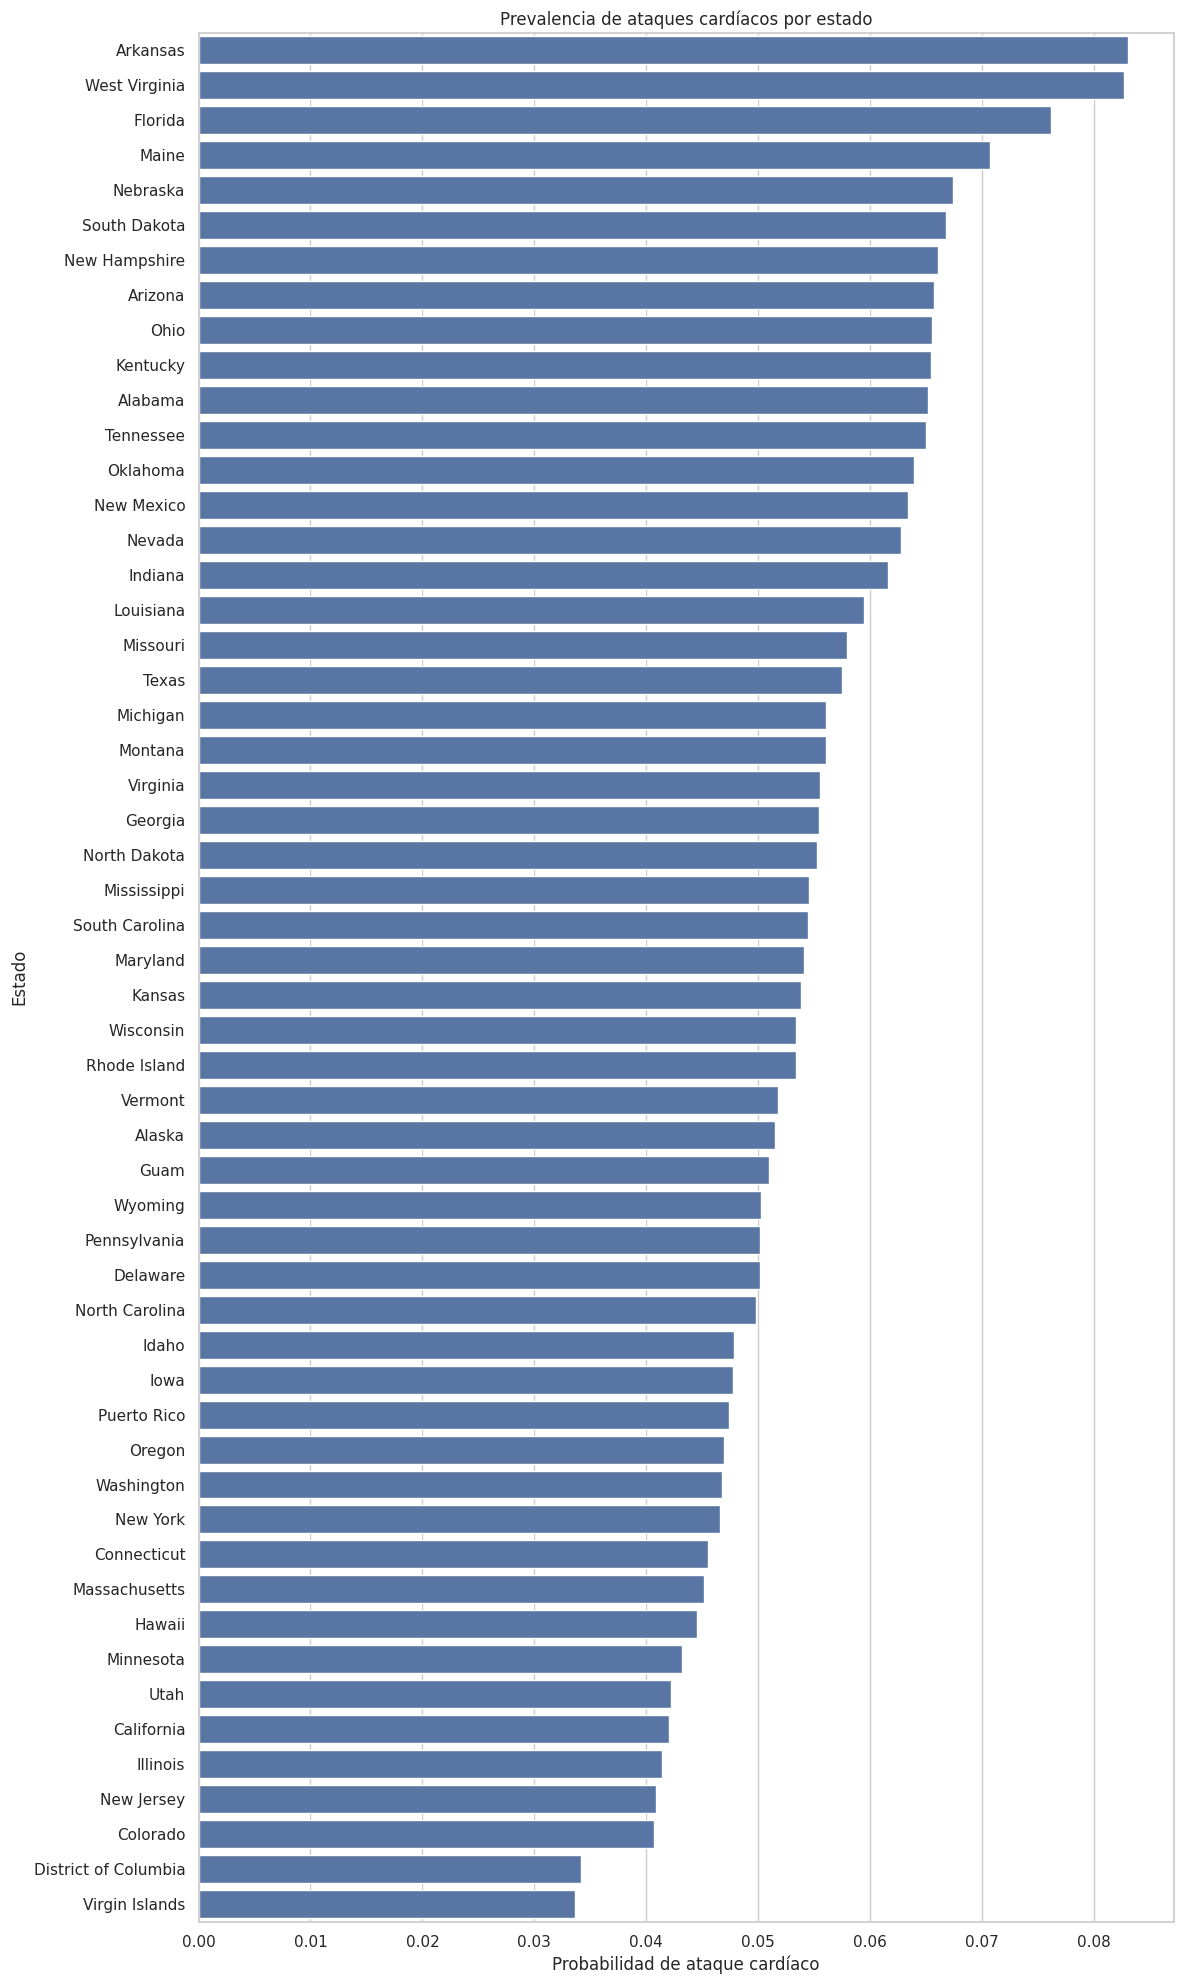

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'HadHeartAttack' to numeric
df['HadHeartAttack'] = (df['HadHeartAttack'] == 'Yes').astype(int)

# Calculate the average heart attack rate for each state
state_heart_attack_rates = df.groupby('State')['HadHeartAttack'].mean().sort_values(ascending=False)

# Create the plot
plt.figure(figsize=(12, 20))
sns.barplot(y=state_heart_attack_rates.index, x=state_heart_attack_rates.values, orient='h', ci=None)
plt.title('Prevalencia de ataques cardíacos por estado')
plt.xlabel('Probabilidad de ataque cardíaco')
plt.ylabel('Estado')
plt.tight_layout()
plt.show()


In [ ]:
bmi_average = df.groupby('Sex')['BMI'].mean()
smokers_proportion = df[df['SmokerStatus'] != 'Never smoked'].groupby('Sex')['SmokerStatus'].size() / df.groupby('Sex')['SmokerStatus'].size()
alcohol_drinkers_proportion = df.groupby('Sex')['AlcoholDrinkers'].value_counts(normalize=True).unstack()

preexisting_conditions = ['HadDiabetes', 'HadStroke', 'HadCOPD', 'HadDepressiveDisorder']
conditions_proportion = df[preexisting_conditions].apply(lambda x: x.map({'Yes': 1, 'No': 0})).groupby(df['Sex']).mean()

bmi_average, smokers_proportion, alcohol_drinkers_proportion, conditions_proportion


(Sex
 Female    28.619383
 Male      28.720848
 Name: BMI, dtype: float64,
 Sex
 Female    0.368043
 Male      0.433504
 Name: SmokerStatus, dtype: float64,
 AlcoholDrinkers        No       Yes
 Sex                                
 Female           0.494910  0.505090
 Male             0.401485  0.598515,
         HadDiabetes  HadStroke   HadCOPD  HadDepressiveDisorder
 Sex                                                            
 Female     0.133569   0.040755  0.085126               0.261378
 Male       0.150304   0.041477  0.068640               0.145613)

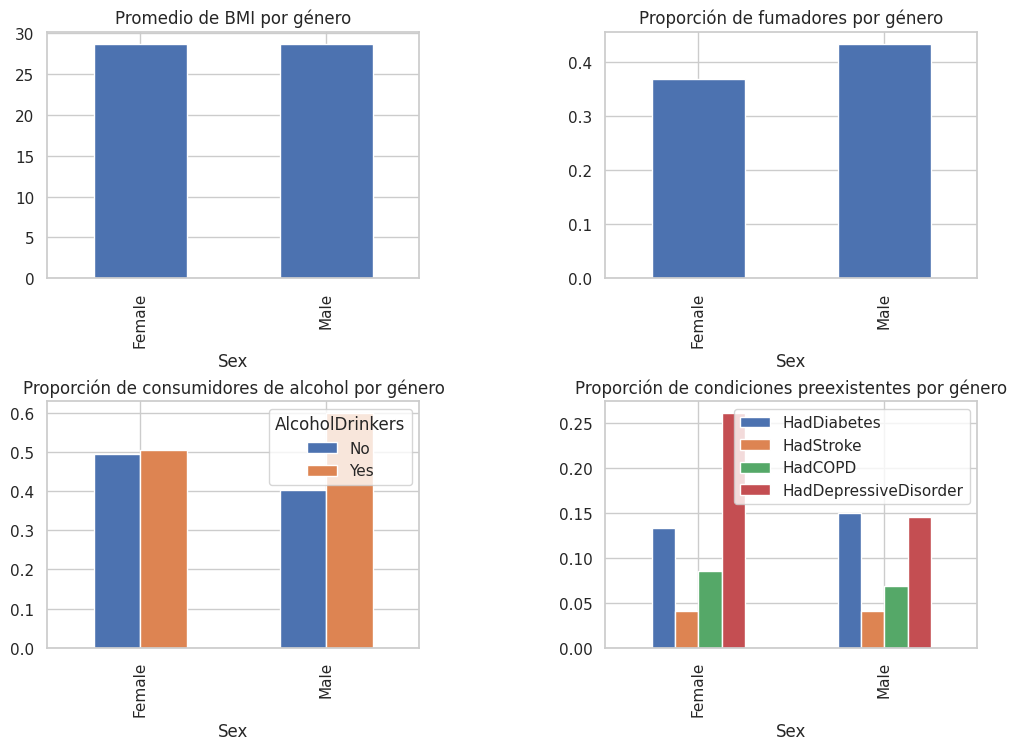

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

bmi_average.plot(kind='bar', ax=axes[0, 0], title='Promedio de BMI por género')

smokers_proportion.plot(kind='bar', ax=axes[0, 1], title='Proporción de fumadores por género')

alcohol_drinkers_proportion.plot(kind='bar', ax=axes[1, 0], title='Proporción de consumidores de alcohol por género')

conditions_proportion.plot(kind='bar', ax=axes[1, 1], title='Proporción de condiciones preexistentes por género')

plt.subplots_adjust(hspace=0.5, wspace=0.5)

plt.show()

In [ ]:
checkup_groups = df.groupby('LastCheckupTime')['HadHeartAttack'].mean().sort_values()

checkup_groups


LastCheckupTime
5 or more years ago                                        0.017526
Within past 5 years (2 years but less than 5 years ago)    0.019863
Within past 2 years (1 year but less than 2 years ago)     0.025186
Within past year (anytime less than 12 months ago)         0.062507
Name: HadHeartAttack, dtype: float64

In [ ]:
df['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 24.9, 29.9, float('inf')], labels=['Normal', 'Sobrepeso', 'Obesidad'])
bmi_smoking_groups = df.groupby(['BMI_Category', 'SmokerStatus'])['HadHeartAttack'].mean().unstack()

bmi_smoking_groups


SmokerStatus,Current smoker - now smokes every day,Current smoker - now smokes some days,Former smoker,Never smoked
BMI_Category,,,,
Normal,0.076159,0.059684,0.064439,0.027260
Sobrepeso,0.085013,0.070800,0.083015,0.038664
Obesidad,0.088255,0.073977,0.093089,0.043989


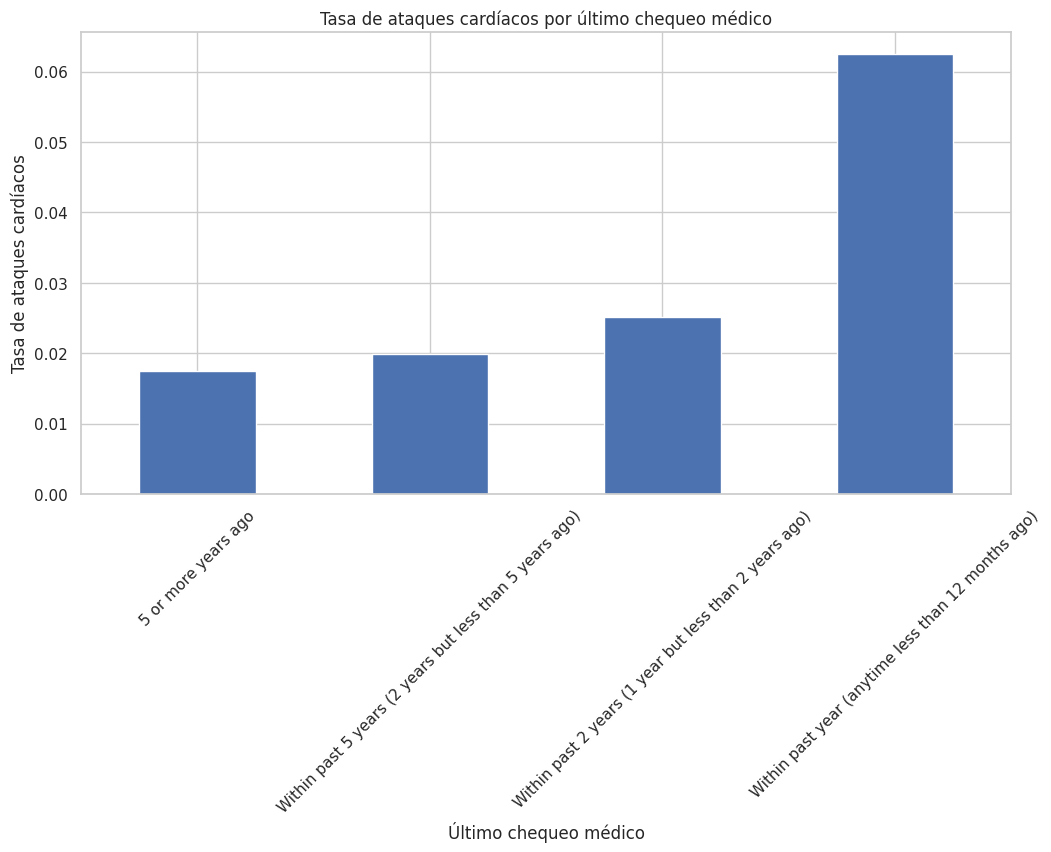

In [ ]:
checkup_groups.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Último chequeo médico')
plt.ylabel('Tasa de ataques cardíacos')
plt.title('Tasa de ataques cardíacos por último chequeo médico')
plt.xticks(rotation=45)
plt.show()


In [ ]:
activity_sleep_groups = df.groupby(['PhysicalActivities', 'SleepHours'])['HadHeartAttack'].mean().unstack()

activity_sleep_groups


SleepHours,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,22.0,23.0,24.0
PhysicalActivities,,,,,,,,,,,,,,,,,,,,,
No,0.142857,0.208696,0.154728,0.141938,0.103154,0.083004,0.063558,0.085067,0.093465,0.143508,...,0.180556,0.210526,0.197368,0.222222,0.116279,0.333333,0.08,0.333333,1.0,0.0
Yes,0.068000,0.084314,0.092391,0.085693,0.052947,0.043079,0.033433,0.046192,0.058915,0.084937,...,0.105263,0.067797,0.113924,0.000000,0.150000,0.000000,0.16,0.500000,0.0,0.0


In [ ]:
ethnicity_heart_attack_rates = df.groupby('RaceEthnicityCategory')['HadHeartAttack'].mean().sort_values()

ethnicity_heart_attack_rates


RaceEthnicityCategory
Hispanic                         0.038059
Black only, Non-Hispanic         0.045991
Other race only, Non-Hispanic    0.048423
White only, Non-Hispanic         0.057724
Multiracial, Non-Hispanic        0.060921
Name: HadHeartAttack, dtype: float64

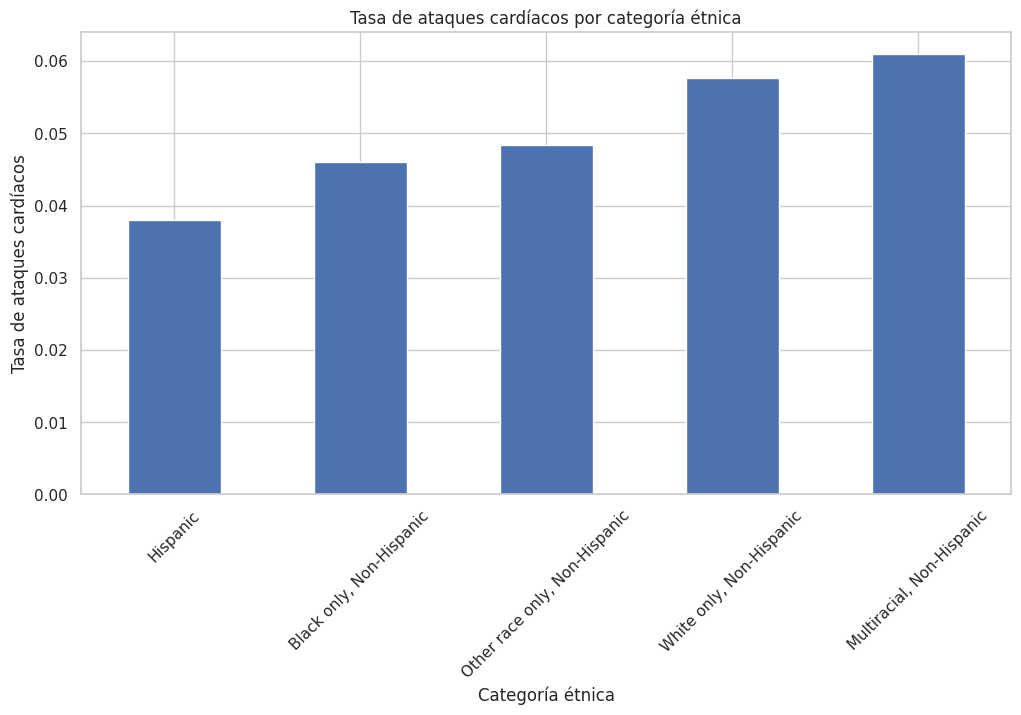

In [ ]:

ethnicity_heart_attack_rates.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Categoría étnica')
plt.ylabel('Tasa de ataques cardíacos')
plt.title('Tasa de ataques cardíacos por categoría étnica')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Categorizar el consumo de alcohol y cruzar con BMI y el estado de fumador para calcular la prevalencia de ataques cardíacos
alcohol_bmi_smoking_groups = df.groupby(['AlcoholDrinkers', 'BMI_Category', 'SmokerStatus'])['HadHeartAttack'].mean().unstack().fillna(0)

alcohol_bmi_smoking_groups


SmokerStatus                  Current smoker - now smokes every day  \
AlcoholDrinkers BMI_Category                                          
No              Normal                                     0.096354   
                Sobrepeso                                  0.108571   
                Obesidad                                   0.106619   
Yes             Normal                                     0.057753   
                Sobrepeso                                  0.063961   
                Obesidad                                   0.067777   

SmokerStatus                  Current smoker - now smokes some days  \
AlcoholDrinkers BMI_Category                                          
No              Normal                                     0.091787   
                Sobrepeso                                  0.109290   
                Obesidad                                   0.106679   
Yes             Normal                                     0.038412   
                Sobrepeso                                  0.046525   
                Obesidad                                   0.051735   

SmokerStatus                  Former smoker  Never smoked  
AlcoholDrinkers BMI_Category                               
No              Normal             0.094634      0.040533  
                Sobrepeso          0.111797      0.053218  
                Obesidad           0.119335      0.056381  
Yes             Normal             0.044283      0.017081  
                Sobrepeso          0.063642      0.027713  
                Obesidad           0.069605      0.031277

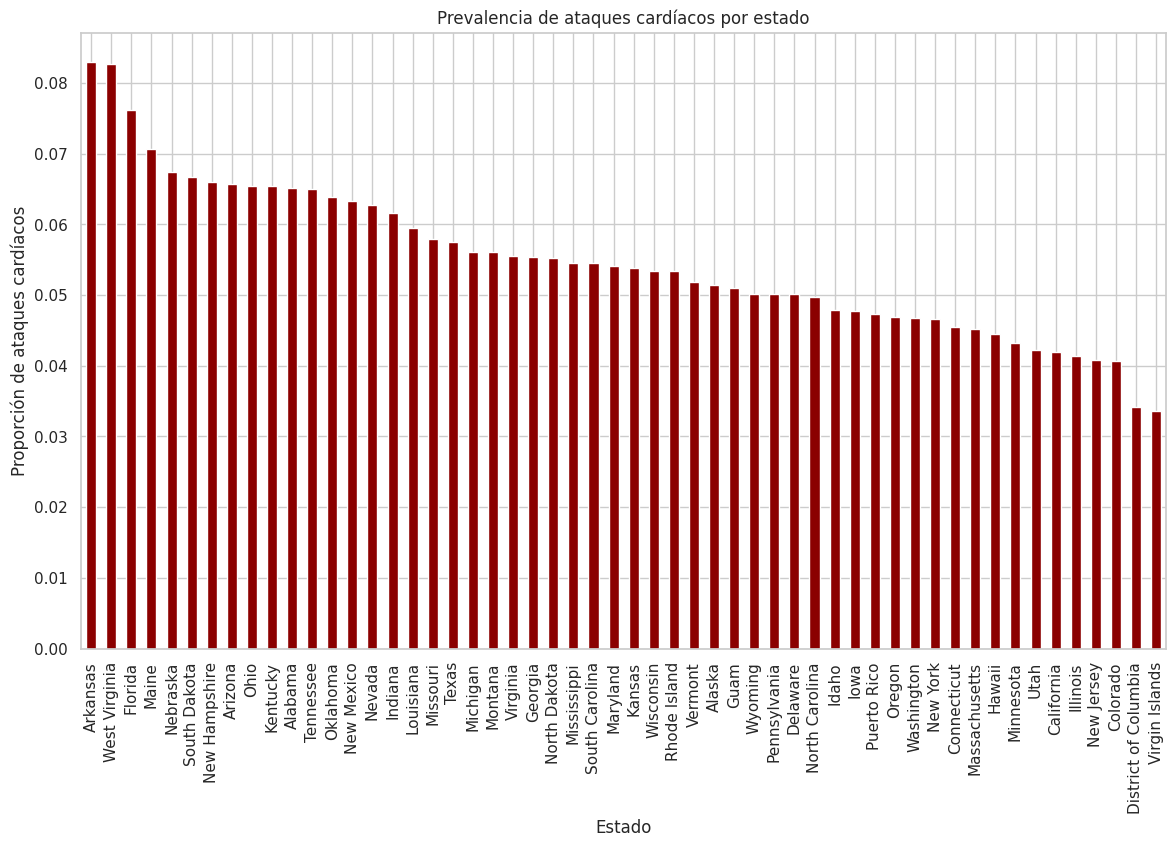

In [ ]:
df['HeartAttack'] = (df['HadHeartAttack'] == 'Yes')

state_heart_attack_counts = df.groupby('State')['HeartAttack'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
state_heart_attack_counts.plot(kind='bar', color='darkred')
plt.title('Prevalencia de ataques cardíacos por estado')
plt.xlabel('Estado')
plt.ylabel('Proporción de ataques cardíacos')
plt.xticks(rotation=90)
plt.show()


In [ ]:
if 'MentalHealthDays' in df.columns:
    mental_health_impact = df.groupby(pd.cut(df['MentalHealthDays'], bins=[0, 1, 7, 30], right=False, labels=['0-1 días', '1-7 días', '7-30 días']))['HadHeartAttack'].mean()

    mental_health_impact
else:
    mental_health_impact = "La columna relacionada con la salud mental no está disponible en el dataset."

mental_health_impact


In [ ]:
# Agrupar por horas de sueño y calcular la tasa de ataques cardíacos
sleep_hours_impact = df.groupby('SleepHours')['HadHeartAttack'].mean()

sleep_hours_impact


TypeError: Could not convert NoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoYesYesYesNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoYesNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoYesNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNo to numeric

In [ ]:
physical_activity_impact = df.groupby('PhysicalActivities')['HadHeartAttack'].mean()

physical_activity_impact


In [ ]:
import numpy as np

variables_of_interest = ['BMI', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'PhysicalActivities', 'AlcoholDrinkers', 'SmokerStatus']

cases = df[df['HadHeartAttack'] == 1]
controls = df[df['HadHeartAttack'] == 0]

case_stats = cases[variables_of_interest].describe()
control_stats = controls[variables_of_interest].describe()

mean_differences = case_stats.loc['mean'] - control_stats.loc['mean']

case_stats, control_stats, mean_differences


(       BMI  PhysicalHealthDays  MentalHealthDays  SleepHours
 count  0.0                 0.0               0.0         0.0
 mean   NaN                 NaN               NaN         NaN
 std    NaN                 NaN               NaN         NaN
 min    NaN                 NaN               NaN         NaN
 25%    NaN                 NaN               NaN         NaN
 50%    NaN                 NaN               NaN         NaN
 75%    NaN                 NaN               NaN         NaN
 max    NaN                 NaN               NaN         NaN,
        BMI  PhysicalHealthDays  MentalHealthDays  SleepHours
 count  0.0                 0.0               0.0         0.0
 mean   NaN                 NaN               NaN         NaN
 std    NaN                 NaN               NaN         NaN
 min    NaN                 NaN               NaN         NaN
 25%    NaN                 NaN               NaN         NaN
 50%    NaN                 NaN               NaN         NaN
 75%   

In [ ]:
print(df.columns[28])
print(df['HadHeartAttack'].value_counts())
print(df.groupby('RaceEthnicityCategory')['HadHeartAttack'].value_counts(normalize=True))

RaceEthnicityCategory
HadHeartAttack
No     232587
Yes     13435
Name: count, dtype: int64
RaceEthnicityCategory          HadHeartAttack
Black only, Non-Hispanic       No                0.954009
                               Yes               0.045991
Hispanic                       No                0.961941
                               Yes               0.038059
Multiracial, Non-Hispanic      No                0.939079
                               Yes               0.060921
Other race only, Non-Hispanic  No                0.951577
                               Yes               0.048423
White only, Non-Hispanic       No                0.942276
                               Yes               0.057724
Name: proportion, dtype: float64


In [ ]:

cols_of_interest = ['GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays', 'SmokerStatus', 'PhysicalActivities', 'BMI', 'AgeCategory']

df_multiracial = df[df['RaceEthnicityCategory'] == 'Multiracial, Non-Hispanic'][cols_of_interest]

display(df_multiracial.describe())

print(df_multiracial['SmokerStatus'].value_counts(normalize=True))

,PhysicalHealthDays,MentalHealthDays,BMI
count,5581.000000,5581.000000,5581.000000
mean,4.947859,6.099624,29.143865
std,9.063968,9.487575,7.117357
min,0.000000,0.000000,12.870000
25%,0.000000,0.000000,24.210000
50%,0.000000,1.000000,27.890000
75%,5.000000,10.000000,32.870000
max,30.000000,30.000000,88.770000


SmokerStatus
Never smoked                             0.551156
Former smoker                            0.267694
Current smoker - now smokes every day    0.131518
Current smoker - now smokes some days    0.049633
Name: proportion, dtype: float64


In [ ]:
df_multiracial = df[df['RaceEthnicityCategory'] == 'Multiracial, Non-Hispanic']

df_multiracial['HadHeartAttack_numeric'] = df_multiracial['HadHeartAttack'].apply(lambda x: 1 if x == 'Yes' else 0)

correlation = df_multiracial[['MentalHealthDays', 'HadHeartAttack_numeric']].corr(method='pearson')
print('Correlation between Mental Health Days and Heart Attack Incidence:')
print(correlation)

Correlation between Mental Health Days and Heart Attack Incidence:
                        MentalHealthDays  HadHeartAttack_numeric
MentalHealthDays                1.000000                0.029938
HadHeartAttack_numeric          0.029938                1.000000


<ipython-input-59-fae33e692c3b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_multiracial['HadHeartAttack_numeric'] = df_multiracial['HadHeartAttack'].apply(lambda x: 1 if x == 'Yes' else 0)


In [ ]:
print(df.groupby('RaceEthnicityCategory')['HadHeartAttack'].value_counts(normalize=True))

RaceEthnicityCategory          HadHeartAttack
Black only, Non-Hispanic       No                0.954009
                               Yes               0.045991
Hispanic                       No                0.961941
                               Yes               0.038059
Multiracial, Non-Hispanic      No                0.939079
                               Yes               0.060921
Other race only, Non-Hispanic  No                0.951577
                               Yes               0.048423
White only, Non-Hispanic       No                0.942276
                               Yes               0.057724
Name: proportion, dtype: float64


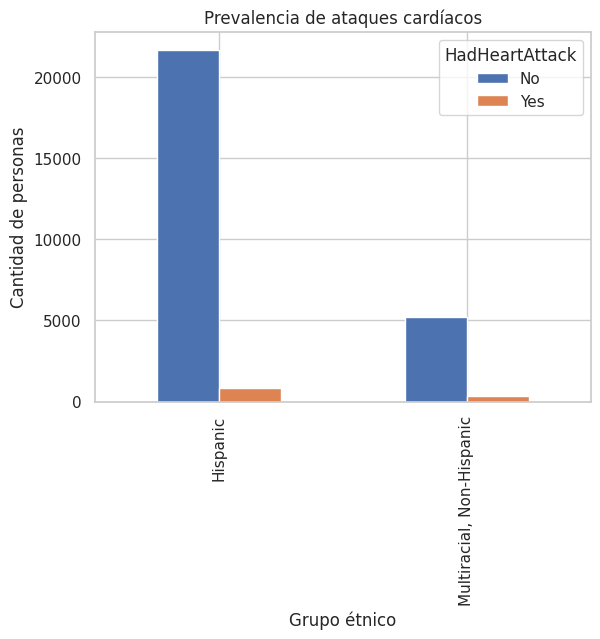

In [ ]:
heart_attack_data = df[df['RaceEthnicityCategory'].isin(['Multiracial, Non-Hispanic', 'Hispanic'])]
prevalence = heart_attack_data.groupby(['RaceEthnicityCategory', 'HadHeartAttack']).size().unstack('HadHeartAttack')

fig, ax = plt.subplots()
prevalence.plot(kind='bar', ax=ax)
ax.set_title('Prevalencia de ataques cardíacos')
ax.set_xlabel('Grupo étnico')
ax.set_ylabel('Cantidad de personas')
plt.show()

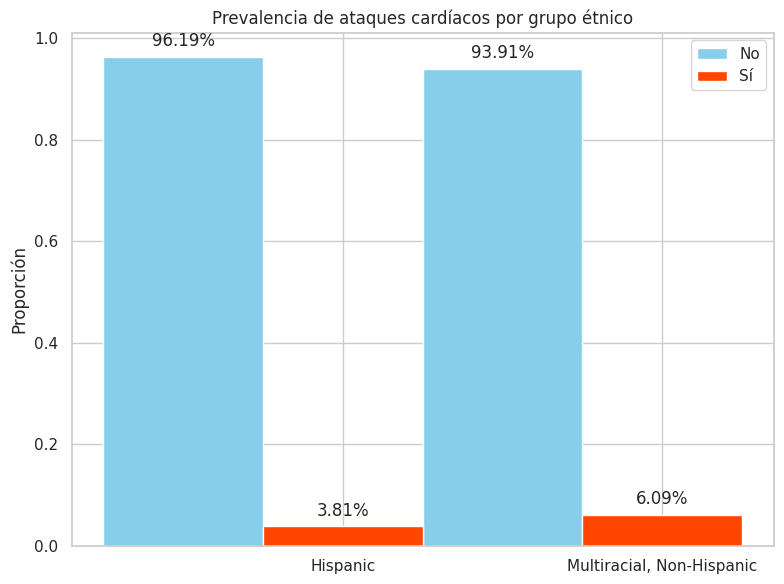

In [ ]:
df_filtered = df[df['RaceEthnicityCategory'].isin(['Multiracial, Non-Hispanic', 'Hispanic'])]

data = df_filtered.groupby('RaceEthnicityCategory')['HadHeartAttack'].value_counts(normalize=True).unstack()

fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 0.5

r1 = np.arange(len(data.index))
r2 = [x + bar_width for x in r1]

bars1 = ax.bar(r1, data['No'], width=bar_width, label='No', color='skyblue')
bars2 = ax.bar(r2, data['Yes'], width=bar_width, label='Sí', color='orangered')

# Añadir etiquetas de porcentaje en cada barra
for bar1, bar2, group in zip(bars1, bars2, data.index):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    ax.annotate(f'{height1:.2%}', xy=(bar1.get_x() + bar1.get_width() / 2, height1), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
    ax.annotate(f'{height2:.2%}', xy=(bar2.get_x() + bar2.get_width() / 2, height2), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

# Configurar los ejes y el título
ax.set_xticks(r2)
ax.set_xticklabels(data.index)
ax.set_ylabel('Proporción')
ax.set_title('Prevalencia de ataques cardíacos por grupo étnico')
ax.legend()

plt.tight_layout()
plt.show()

<ipython-input-65-9bb13ee76eca>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_multiracial['HadHeartAttack_numeric'] = df_multiracial['HadHeartAttack'].apply(lambda x: 1 if x == 'Yes' else 0)


NameError: name 'df_hispanic' is not defined

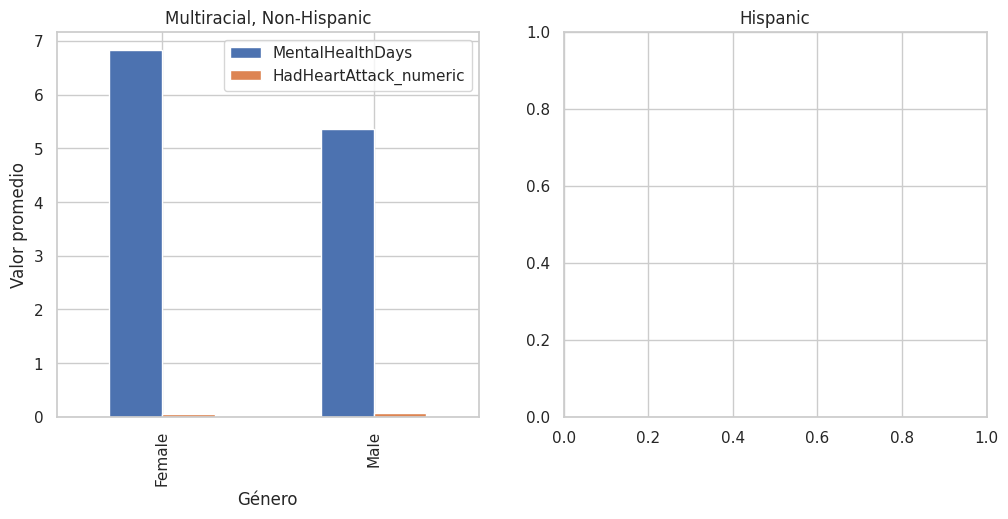

In [ ]:
import matplotlib.pyplot as plt

# Multiracial, Non-Hispanic
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.set_title('Multiracial, Non-Hispanic')
df_multiracial['HadHeartAttack_numeric'] = df_multiracial['HadHeartAttack'].apply(lambda x: 1 if x == 'Yes' else 0)
df_gender_group_multiracial = df_multiracial.groupby('Sex').agg({'MentalHealthDays': 'mean', 'HadHeartAttack_numeric': 'mean'})
df_gender_group_multiracial.plot(kind='bar', ax=ax1)
ax1.set_xlabel('Género')
ax1.set_ylabel('Valor promedio')

# Hispanic
ax2.set_title('Hispanic')
df_hispanic['HadHeartAttack_numeric'] = df_hispanic['HadHeartAttack'].apply(lambda x: 1 if x == 'Yes' else 0)
df_gender_group_hispanic = df_hispanic.groupby('Sex').agg({'MentalHealthDays': 'mean', 'HadHeartAttack_numeric': 'mean'})
df_gender_group_hispanic.plot(kind='bar', ax=ax2)
ax2.set_xlabel('Género')
ax2.set_ylabel('Valor promedio')

plt.show()

Grafico por separado

Comparacion de variables segun grupos etnicos.


In [ ]:
df_hispanic['PhysicalActivities_numeric'] = df_hispanic['PhysicalActivities'].map({'No': 0, 'Yes': 1})


NameError: name 'df_hispanic' is not defined

<ipython-input-67-ec017889dfa9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hispanic['SmokerStatus_numeric'] = df_hispanic['SmokerStatus'].map({'Non-smoker': 0, 'Former smoker': 1, 'Current smoker': 2})
<ipython-input-67-ec017889dfa9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hispanic['PhysicalActivities_numeric'] = df_hispanic['PhysicalActivities'].map({'Yes': 1, 'No': 0})
<ipython-input-67-ec017889dfa9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

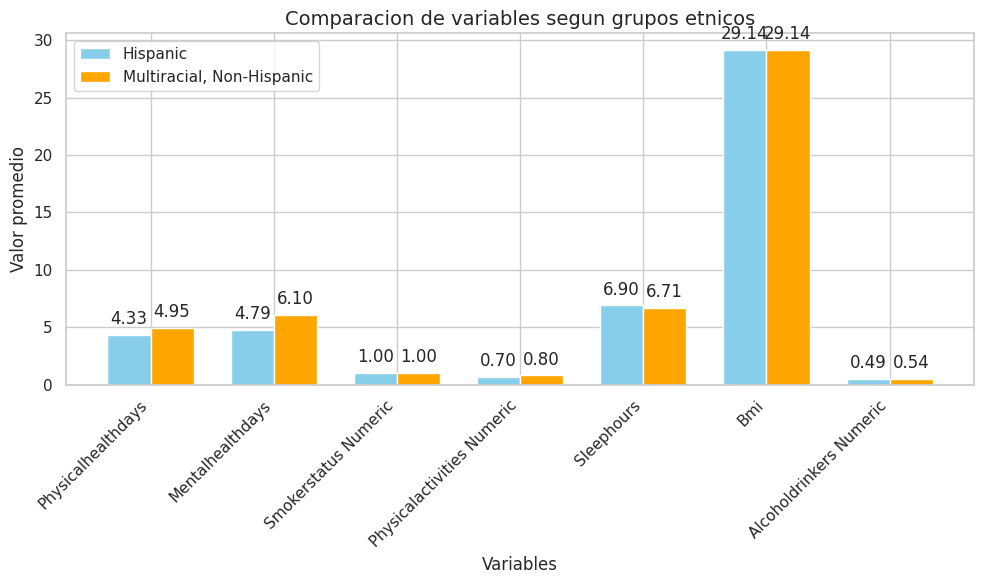

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Preparar los datos
cols_numeric = ['PhysicalHealthDays', 'MentalHealthDays', 'SmokerStatus_numeric', 'PhysicalActivities_numeric', 'SleepHours', 'BMI', 'AlcoholDrinkers_numeric']

df_hispanic = df_filtered[df_filtered['RaceEthnicityCategory'] == 'Hispanic']
df_multiracial = df_filtered[df_filtered['RaceEthnicityCategory'] == 'Multiracial, Non-Hispanic']

df_hispanic['SmokerStatus_numeric'] = df_hispanic['SmokerStatus'].map({'Non-smoker': 0, 'Former smoker': 1, 'Current smoker': 2})
df_hispanic['PhysicalActivities_numeric'] = df_hispanic['PhysicalActivities'].map({'Yes': 1, 'No': 0})
df_hispanic['AlcoholDrinkers_numeric'] = df_hispanic['AlcoholDrinkers'].map({'No': 0, 'Yes': 1})

df_multiracial['SmokerStatus_numeric'] = df_multiracial['SmokerStatus'].map({'Non-smoker': 0, 'Former smoker': 1, 'Current smoker': 2})
df_multiracial['PhysicalActivities_numeric'] = df_multiracial['PhysicalActivities'].map({'Yes': 1, 'No': 0})
df_multiracial['AlcoholDrinkers_numeric'] = df_multiracial['AlcoholDrinkers'].map({'No': 0, 'Yes': 1})

df_hispanic_factors = df_hispanic[cols_numeric].mean()
df_multiracial_factors = df_multiracial[cols_numeric].mean()

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(cols_numeric))

rects1 = ax.bar(index, df_hispanic_factors, bar_width, label='Hispanic', color='skyblue')
rects2 = ax.bar(index + bar_width, df_multiracial_factors, bar_width, label='Multiracial, Non-Hispanic', color='orange')

# Añadir etiquetas y título
ax.set_xlabel('Variables', fontsize=12)
ax.set_ylabel('Valor promedio', fontsize=12)
ax.set_title('Comparacion de variables segun grupos etnicos', fontsize=14)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels([factor.replace('_', ' ').title() for factor in cols_numeric], rotation=45, ha='right')
ax.legend()

# Añadir etiquetas de valor en cada barra
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Head of SmokerStatus_numeric:
0    1
1    1
2    1
3    0
4    0
Name: SmokerStatus_numeric, dtype: int64

Head of PhysicalActivities_numeric:
0    1
1    1
2    0
3    1
4    1
Name: PhysicalActivities_numeric, dtype: int64

Summary statistics for new columns:
       SmokerStatus_numeric  PhysicalActivities_numeric
count         246022.000000               246022.000000
mean               0.608490                    0.777646
std                0.912301                    0.415829
min                0.000000                    0.000000
25%                0.000000                    1.000000
50%                0.000000                    1.000000
75%                1.000000                    1.000000
max                3.000000                    1.000000


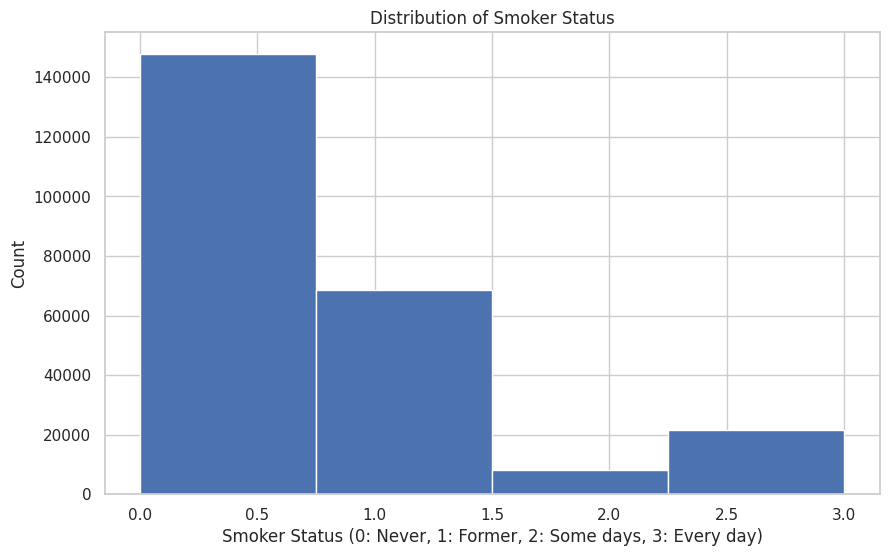

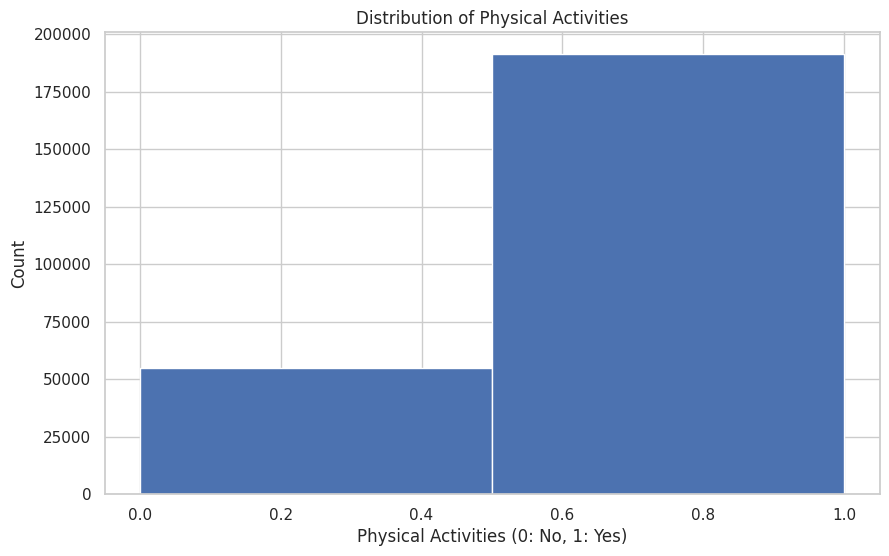

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# Create numeric columns
df['SmokerStatus_numeric'] = df['SmokerStatus'].map({
    'Current smoker - now smokes every day': 3,
    'Current smoker - now smokes some days': 2,
    'Former smoker': 1,
    'Never smoked': 0
})

df['PhysicalActivities_numeric'] = df['PhysicalActivities'].map({'Yes': 1, 'No': 0})

# Verify the new columns
print("Head of SmokerStatus_numeric:")
print(df['SmokerStatus_numeric'].head())

print("\nHead of PhysicalActivities_numeric:")
print(df['PhysicalActivities_numeric'].head())

# Display summary statistics
print("\nSummary statistics for new columns:")
print(df[['SmokerStatus_numeric', 'PhysicalActivities_numeric']].describe())

# Visualize the distribution of SmokerStatus_numeric
plt.figure(figsize=(10, 6))
df['SmokerStatus_numeric'].hist(bins=4)
plt.title('Distribution of Smoker Status')
plt.xlabel('Smoker Status (0: Never, 1: Former, 2: Some days, 3: Every day)')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of PhysicalActivities_numeric
plt.figure(figsize=(10, 6))
df['PhysicalActivities_numeric'].hist(bins=2)
plt.title('Distribution of Physical Activities')
plt.xlabel('Physical Activities (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()


In [ ]:
df_hispanic = df_filtered[df_filtered['RaceEthnicityCategory'] == 'Hispanic']
df_multiracial = df_filtered[df_filtered['RaceEthnicityCategory'] == 'Multiracial, Non-Hispanic']

bmi_promedio_hispanic = df_hispanic['BMI'].mean()
bmi_promedio_multiracial = df_multiracial['BMI'].mean()


In [ ]:
bmi_promedio_hispanic

29.137138236597252

In [ ]:
bmi_promedio_multiracial

29.143864898763656

In [ ]:

print(df_multiracial['SmokerStatus'].unique())

# Valores únicos de 'BMI'
print(df_multiracial['BMI'].unique())

print(df_multiracial['PhysicalActivities'].unique())

['Never smoked' 'Former smoker' 'Current smoker - now smokes some days'
 'Current smoker - now smokes every day']
[32.23 32.08 28.8  ... 28.79 40.43 27.02]
['Yes' 'No']


In [ ]:
smoker_status_categories = ['Never smoked', 'Former smoker', 'Current smoker - now smokes some days'
,'Current smoker - now smokes every day']

In [ ]:
smoker_status_counts_hispanic

In [ ]:
smoker_status_counts_multiracial

BMI y Numeric

In [ ]:
Hispanic = df[df['RaceEthnicityCategory'] == 'Hispanic']

hispanic_cantidad_por_estado = Hispanic.groupby('State')['State'].count()

total_hispanics = hispanic_cantidad_por_estado.sum()

hispanic_porcentaje_por_estado = (hispanic_cantidad_por_estado / total_hispanics) * 100

hispanic_porcentaje_por_estado = hispanic_porcentaje_por_estado.sort_values(ascending=False)

hispanic_porcentaje_por_estado = hispanic_porcentaje_por_estado.apply(lambda x: f'{x:.2f}%')

print(hispanic_porcentaje_por_estado)


State
Puerto Rico             15.78%
Texas                    8.18%
California               5.99%
New York                 5.20%
New Mexico               4.72%
Washington               4.61%
Arizona                  4.21%
Colorado                 3.53%
Massachusetts            2.89%
Florida                  2.72%
New Jersey               2.53%
Maryland                 2.53%
Utah                     2.44%
Connecticut              2.30%
Hawaii                   2.00%
Illinois                 1.93%
Iowa                     1.86%
Minnesota                1.71%
Nebraska                 1.58%
Rhode Island             1.37%
Kansas                   1.29%
Nevada                   1.20%
Indiana                  1.17%
Idaho                    1.16%
Oregon                   1.15%
Virginia                 1.09%
Georgia                  1.07%
Wisconsin                1.03%
Ohio                     0.97%
Oklahoma                 0.89%
North Carolina           0.89%
South Carolina           0.75%
De

In [ ]:
pip install folium

In [ ]:
data = hispanic_porcentaje_por_estado.reset_index()
data.columns = ['Estado', 'Porcentaje']
estados = pd.DataFrame(data)

ValueError: cannot insert State, already exists

In [ ]:
coordenadas = {
    'Puerto Rico': [18.2208, -66.5901], 'Texas': [31.9686, -99.9018], 'California': [36.7783, -119.4179],
    'New York': [42.1497, -74.9384], 'New Mexico': [34.5199, -105.8701], 'Washington': [47.3917, -121.5708],
    'Arizona': [34.0489, -111.0937], 'Colorado': [39.0598, -105.3111], 'Massachusetts': [42.2373, -71.5314],
    'Florida': [27.6648, -81.5158], 'New Jersey': [40.0583, -74.4057], 'Maryland': [39.0639, -76.8021],
    'Utah': [39.3210, -111.0937], 'Connecticut': [41.5978, -72.7554], 'Hawaii': [19.8968, -155.5828],
    'Illinois': [40.3495, -88.9861], 'Iowa': [42.0115, -93.2105], 'Minnesota': [45.6945, -93.9002],
    'Nebraska': [41.1254, -98.2676], 'Rhode Island': [41.6809, -71.5118], 'Kansas': [38.5266, -96.7265],
    'Nevada': [38.4199, -117.1219], 'Indiana': [39.8494, -86.2583], 'Idaho': [44.2405, -114.4788],
    'Oregon': [44.5720, -122.0709], 'Virginia': [37.7693, -78.1700], 'Georgia': [33.0406, -83.6431],
    'Wisconsin': [44.2685, -89.6165], 'Ohio': [40.3888, -82.7649], 'Oklahoma': [35.5653, -96.9289],
    'North Carolina': [35.6301, -79.8064], 'South Carolina': [33.8569, -80.9450], 'Delaware': [39.3185, -75.5072],
    'Pennsylvania': [40.5908, -77.2098], 'Michigan': [43.3266, -84.5361], 'Wyoming': [42.7475, -107.2085],
    'Vermont': [44.0459, -72.7107], 'Alaska': [64.2008, -149.4937], 'South Dakota': [44.2998, -99.4388],
    'Virgin Islands': [18.3358, -64.8963], 'Missouri': [38.4561, -92.2884], 'Montana': [46.9219, -110.4544],
    'Maine': [44.6939, -69.3819], 'District of Columbia': [38.9072, -77.0369], 'Arkansas': [34.9697, -92.3731],
    'Tennessee': [35.7478, -86.6923], 'Louisiana': [31.1695, -91.8678], 'Guam': [13.4443, 144.7937],
    'Kentucky': [37.6681, -84.6701], 'New Hampshire': [43.4525, -71.5639], 'North Dakota': [47.5289, -99.7840],
    'Alabama': [32.7990, -86.6818], 'Mississippi': [32.7416, -89.6787], 'West Virginia': [38.4912, -80.9545]
}

In [ ]:
import pandas as pd
import plotly.express as px


# Crear columnas de latitud, longitud y valor en el DataFrame
estados['lat'] = [coordenadas.get(estado, [0, 0])[0] for estado in estados['Estado']]
estados['lon'] = [coordenadas.get(estado, [0, 0])[1] for estado in estados['Estado']]
estados['valor'] = estados['Porcentaje']

# Crear el mapa de calor
fig = px.scatter_mapbox(estados, lat='lat', lon='lon', size='valor',
                        size_max=30,
                        color='valor',
                        color_continuous_scale='Viridis',
                        hover_name='Estado',
                        hover_data=['Porcentaje'],
                        zoom=3,
                        mapbox_style='open-street-map')

fig.update_layout(title='Mapa de Calor: Porcentaje de Población Hispana por Estado')

fig.show()

NameError: name 'estados' is not defined

In [ ]:
multi_racial = df[df['RaceEthnicityCategory'] == 'Multiracial, Non-Hispanic']

multi_racial_cantidad_por_estado = multi_racial.groupby('State')['State'].count()

total_multi_racial = multi_racial_cantidad_por_estado.sum()

multi_racial_porcentaje_por_estado = (multi_racial_cantidad_por_estado / total_multi_racial) * 100

multi_racial_porcentaje_por_estado = multi_racial_porcentaje_por_estado.sort_values(ascending=False)

multi_racial_porcentaje_por_estado = multi_racial_porcentaje_por_estado.apply(lambda x: f'{x:.2f}%')

print(multi_racial_porcentaje_por_estado)


State
Hawaii                  18.33%
Washington               8.69%
Guam                     3.51%
Alaska                   3.30%
Oklahoma                 2.85%
Maryland                 2.78%
New York                 2.53%
Florida                  2.44%
Texas                    2.42%
Ohio                     2.42%
Minnesota                2.40%
California               2.28%
Kansas                   2.08%
Montana                  1.95%
Virginia                 1.79%
Oregon                   1.77%
Indiana                  1.74%
South Carolina           1.74%
Colorado                 1.72%
Arizona                  1.67%
South Dakota             1.59%
Georgia                  1.58%
Wisconsin                1.56%
Maine                    1.47%
Michigan                 1.47%
Connecticut              1.45%
Massachusetts            1.45%
Missouri                 1.38%
Arkansas                 1.27%
Vermont                  1.20%
Iowa                     1.20%
Louisiana                1.20%
Id

In [ ]:
coordenadas = {
    'Puerto Rico': [18.2208, -66.5901],
    'Texas': [31.9686, -99.9018],
    'California': [36.7783, -119.4179],
    'New York': [42.1497, -74.9384],
    'New Mexico': [34.5199, -105.8701],
    'Washington': [47.3917, -121.5708],
    'Arizona': [34.0489, -111.0937],
    'Colorado': [39.0598, -105.3111],
    'Massachusetts': [42.2373, -71.5314],
    'Florida': [27.6648, -81.5158],
    'New Jersey': [40.0583, -74.4057],
    'Maryland': [39.0639, -76.8021],
    'Utah': [39.3210, -111.0937],
    'Connecticut': [41.5978, -72.7554],
    'Hawaii': [19.8968, -155.5828],
    'Illinois': [40.3495, -88.9861],
    'Iowa': [42.0115, -93.2105],
    'Minnesota': [45.6945, -93.9002],
    'Nebraska': [41.1254, -98.2676],
    'Rhode Island': [41.6809, -71.5118],
    'Kansas': [38.5266, -96.7265],
    'Nevada': [38.4199, -117.1219],
    'Indiana': [39.8494, -86.2583],
    'Idaho': [44.2405, -114.4788],
    'Oregon': [44.5720, -122.0709],
    'Virginia': [37.7693, -78.1700],
    'Georgia': [33.0406, -83.6431],
    'Wisconsin': [44.2685, -89.6165],
    'Ohio': [40.3888, -82.7649],
    'Oklahoma': [35.5653, -96.9289],
    'North Carolina': [35.6301, -79.8064],
    'South Carolina': [33.8569, -80.9450],
    'Delaware': [39.3185, -75.5072],
    'Pennsylvania': [40.5908, -77.2098],
    'Michigan': [43.3266, -84.5361],
    'Wyoming': [42.7475, -107.2085],
    'Vermont': [44.0459, -72.7107],
    'Alaska': [64.2008, -149.4937],
    'South Dakota': [44.2998, -99.4388],
    'Virgin Islands': [18.3358, -64.8963],
    'Missouri': [38.4561, -92.2884],
    'Montana': [46.9219, -110.4544],
    'Maine': [44.6939, -69.3819],
    'District of Columbia': [38.9072, -77.0369],
    'Arkansas': [34.9697, -92.3731],
    'Tennessee': [35.7478, -86.6923],
    'Louisiana': [31.1695, -91.8678],
    'Guam': [13.4443, 144.7937],
    'Kentucky': [37.6681, -84.6701],
    'New Hampshire': [43.4525, -71.5639],
    'North Dakota': [47.5289, -99.7840],
    'Alabama': [32.7990, -86.6818],
    'Mississippi': [32.7416, -89.6787],
    'West Virginia': [38.4912, -80.9545]
}

In [ ]:
import pandas as pd
import plotly.express as px

# Crear el DataFrame original
multi_racial = df[df['RaceEthnicityCategory'] == 'Multiracial, Non-Hispanic']
multi_racial_cantidad_por_estado = multi_racial.groupby('State')['State'].count()
total_multi_racial = multi_racial_cantidad_por_estado.sum()
multi_racial_porcentaje_por_estado = (multi_racial_cantidad_por_estado / total_multi_racial) * 100
multi_racial_porcentaje_por_estado = multi_racial_porcentaje_por_estado.sort_values(ascending=False)
multi_racial_porcentaje_por_estado = multi_racial_porcentaje_por_estado.apply(lambda x: f'{x:.2f}%')

# Renombrar la columna 'Estado' del DataFrame original
multi_racial_porcentaje_por_estado = multi_racial_porcentaje_por_estado.rename_axis('Nombre_Estado').reset_index()

# Crear el nuevo DataFrame 'estados'
data = multi_racial_porcentaje_por_estado
data.columns = ['Estado', 'Porcentaje']
estados = pd.DataFrame(data)

In [ ]:
import pandas as pd
import plotly.express as px

estados['valor'] = estados['Porcentaje'].str.replace('%', '').astype(float)

# Crear el mapa de calor
fig = px.scatter_mapbox(estados, lat='lat', lon='lon', size='valor',
                        size_max=30,
                        color='valor',
                        color_continuous_scale='Viridis',
                        hover_name='Estado',
                        hover_data=['Porcentaje'],
                        zoom=3,
                        mapbox_style='open-street-map')

fig.update_layout(title='Mapa de Calor: Porcentaje de Población Multirracial No Hispana por Estado')

fig.show()

ValueError: Value of 'lat' is not the name of a column in 'data_frame'. Expected one of ['Estado', 'Porcentaje', 'valor'] but received: lat

<ipython-input-88-eebca38235af>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hispanic['SmokerStatus_numeric'] = df_hispanic['SmokerStatus'].map({'Non-smoker': 0, 'Former smoker': 1, 'Current smoker': 2})
<ipython-input-88-eebca38235af>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hispanic['PhysicalActivities_numeric'] = df_hispanic['PhysicalActivities'].map({'No': 0, 'Yes': 1})
<ipython-input-88-eebca38235af>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

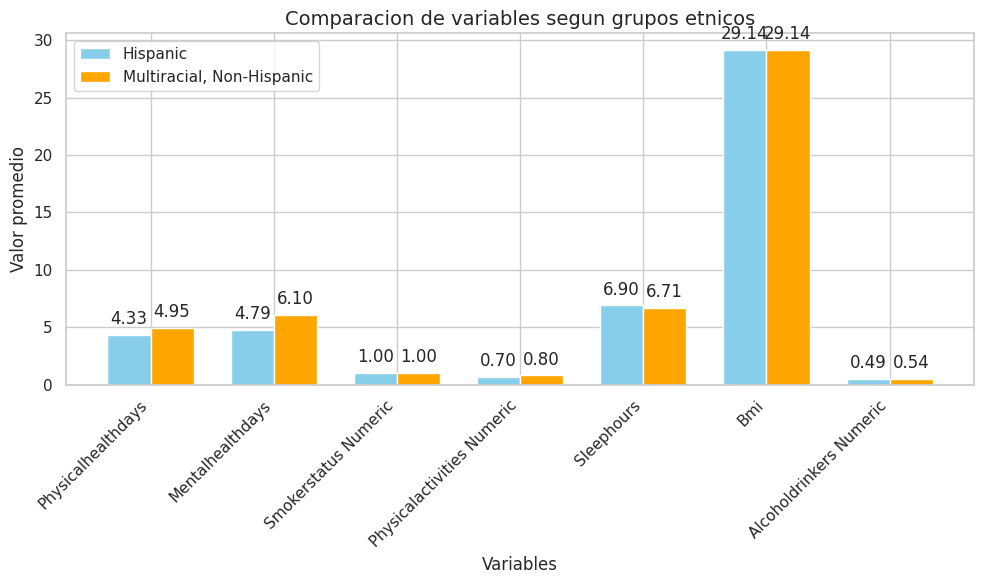

In [ ]:
# Preparar los datos
cols_numeric = ['PhysicalHealthDays', 'MentalHealthDays', 'SmokerStatus_numeric', 'PhysicalActivities_numeric', 'SleepHours', 'BMI', 'AlcoholDrinkers_numeric']

df_hispanic = df_filtered[df_filtered['RaceEthnicityCategory'] == 'Hispanic']



df_hispanic['SmokerStatus_numeric'] = df_hispanic['SmokerStatus'].map({'Non-smoker': 0, 'Former smoker': 1, 'Current smoker': 2})
df_hispanic['PhysicalActivities_numeric'] = df_hispanic['PhysicalActivities'].map({'No': 0, 'Yes': 1})
df_hispanic['AlcoholDrinkers_numeric'] = df_hispanic['AlcoholDrinkers'].map({'No': 0, 'Yes': 1})

df_multiracial['SmokerStatus_numeric'] = df_multiracial['SmokerStatus'].map({'Non-smoker': 0, 'Former smoker': 1, 'Current smoker': 2})
df_multiracial['PhysicalActivities_numeric'] = df_multiracial['PhysicalActivities'].map({'No': 0, 'Yes': 1})
df_multiracial['AlcoholDrinkers_numeric'] = df_multiracial['AlcoholDrinkers'].map({'No': 0, 'Yes': 1})

df_hispanic_factors = df_hispanic[cols_numeric].mean()
df_multiracial_factors = df_multiracial[cols_numeric].mean()

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(cols_numeric))

rects1 = ax.bar(index, df_hispanic_factors, bar_width, label='Hispanic', color='skyblue')
rects2 = ax.bar(index + bar_width, df_multiracial_factors, bar_width, label='Multiracial, Non-Hispanic', color='orange')

# Añadir etiquetas y título
ax.set_xlabel('Variables', fontsize=12)
ax.set_ylabel('Valor promedio', fontsize=12)
ax.set_title('Comparacion de variables segun grupos etnicos', fontsize=14)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels([factor.replace('_', ' ').title() for factor in cols_numeric], rotation=45, ha='right')
ax.legend()

# Añadir etiquetas de valor en cada barra
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
df_hispanic

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,HeartAttack,SmokerStatus_numeric,PhysicalActivities_numeric,AlcoholDrinkers_numeric
239,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,1 to 5,No,...,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No,False,1.0,1,1
533,Alabama,Female,Very good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,8.0,None of them,No,...,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,No,False,NaN,1,0
534,Alabama,Female,Very good,0.0,7.0,Within past year (anytime less than 12 months ...,No,6.0,None of them,No,...,No,Yes,No,"Yes, received Tdap",No,Yes,False,NaN,0,0
556,Alabama,Female,Very good,0.0,7.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,No,Yes,No,"Yes, received Tdap",No,No,False,NaN,1,0
589,Alabama,Female,Poor,30.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,None of them,No,...,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No,False,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245967,Virgin Islands,Male,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,1 to 5,No,...,Yes,No,No,"Yes, received tetanus shot but not sure what type",No,No,False,NaN,1,1
245968,Virgin Islands,Female,Poor,30.0,10.0,Within past year (anytime less than 12 months ...,No,6.0,1 to 5,No,...,Yes,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,False,NaN,0,0
245984,Virgin Islands,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,1 to 5,No,...,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No,False,NaN,1,0
245997,Virgin Islands,Female,Good,4.0,3.0,Within past 2 years (1 year but less than 2 ye...,Yes,5.0,None of them,No,...,Yes,No,Yes,"Yes, received tetanus shot but not sure what type",No,Yes,False,NaN,1,1


In [ ]:
# Asumiendo que ya tienes df_hispanic cargado
# df_hispanic = pd.read_csv('path_to_your_csv_file.csv')

# Lista de estados que te interesan
states_of_interest_hight_atackk = ['Hawaii', 'Washington', 'Guam', 'Alaska']

# Filtrar el DataFrame por los estados de interés
df_filtered_states_hight_atacck = df_hispanic[df_hispanic['State'].isin(states_of_interest_hight_atackk)]

# Mostrar los primeros registros del nuevo DataFrame para verificar
print(df_filtered_states_hight_atacck.head())

# Guardar el nuevo DataFrame en un archivo CSV si es necesario
# df_filtered_states.to_csv('filtered_states.csv', index=False)


       State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
1905  Alaska    Male          Good                 0.0               0.0   
1910  Alaska  Female          Good                 2.0               0.0   
1930  Alaska    Male     Very good                 3.0               5.0   
1965  Alaska  Female          Good                 0.0               0.0   
2088  Alaska  Female     Excellent                 0.0               0.0   

                                        LastCheckupTime PhysicalActivities  \
1905  Within past year (anytime less than 12 months ...                Yes   
1910  Within past year (anytime less than 12 months ...                 No   
1930  Within past 2 years (1 year but less than 2 ye...                 No   
1965  Within past year (anytime less than 12 months ...                Yes   
2088  Within past 5 years (2 years but less than 5 y...                Yes   

      SleepHours            RemovedTeeth HadHeartAttack  ... HIVTesting  \

In [ ]:
# Asumiendo que ya tienes df_hispanic cargado
# df_hispanic = pd.read_csv('path_to_your_csv_file.csv')

# Lista de estados que te interesan
states_of_interest_low_attack = ['Wyoming','Alabama','Mississippi', 'Virgin Islands'   ]

# Filtrar el DataFrame por los estados de interés
df_filtered_states_low_attack = df_hispanic[df_hispanic['State'].isin(states_of_interest_low_attack)]

# Mostrar los primeros registros del nuevo DataFrame para verificar
print(df_filtered_states_low_attack.head())

# Guardar el nuevo DataFrame en un archivo CSV si es necesario
# df_filtered_states.to_csv('filtered_states.csv', index=False)


       State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
239  Alabama    Male     Very good                 0.0               0.0   
533  Alabama  Female     Very good                 0.0               0.0   
534  Alabama  Female     Very good                 0.0               7.0   
556  Alabama  Female     Very good                 0.0               7.0   
589  Alabama  Female          Poor                30.0               0.0   

                                       LastCheckupTime PhysicalActivities  \
239  Within past year (anytime less than 12 months ...                Yes   
533  Within past 2 years (1 year but less than 2 ye...                Yes   
534  Within past year (anytime less than 12 months ...                 No   
556  Within past year (anytime less than 12 months ...                Yes   
589  Within past year (anytime less than 12 months ...                 No   

     SleepHours  RemovedTeeth HadHeartAttack  ... HIVTesting FluVaxLast12  \
239

<ipython-input-99-46e120628cb4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hispanic['SmokerStatus_numeric'] = df_hispanic['SmokerStatus'].map({'Non-smoker': 0, 'Former smoker': 1, 'Current smoker': 2})
<ipython-input-99-46e120628cb4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hispanic['PhysicalActivities_numeric'] = df_hispanic['PhysicalActivities'].map({'No': 0, 'Yes': 1})
<ipython-input-99-46e120628cb4>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

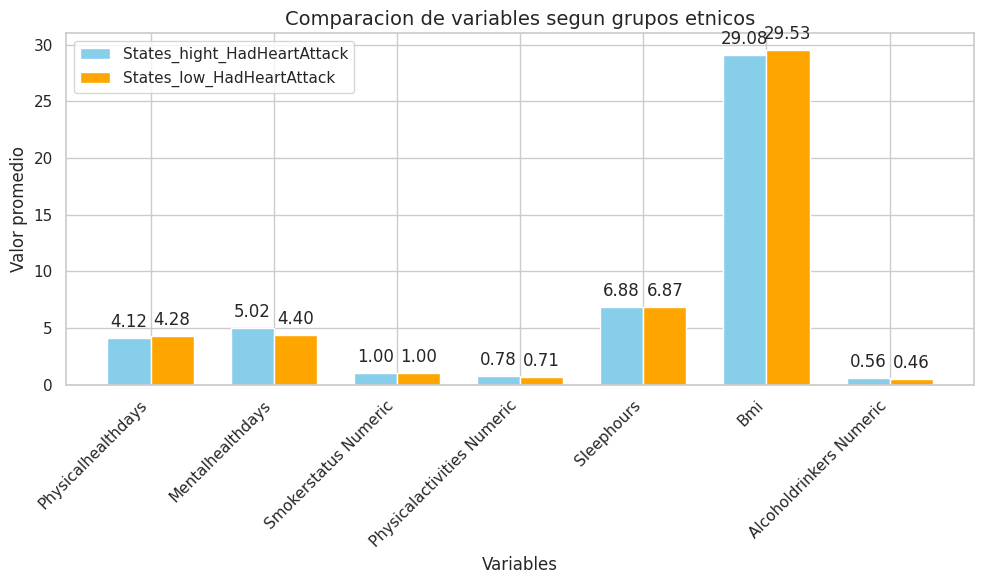

In [ ]:
# Preparar los datos
cols_numeric = ['PhysicalHealthDays', 'MentalHealthDays', 'SmokerStatus_numeric', 'PhysicalActivities_numeric', 'SleepHours', 'BMI', 'AlcoholDrinkers_numeric']

df_hispanic = df_filtered_states_hight_atacck
df_multiracial = df_filtered_states_low_attack

df_hispanic['SmokerStatus_numeric'] = df_hispanic['SmokerStatus'].map({'Non-smoker': 0, 'Former smoker': 1, 'Current smoker': 2})
df_hispanic['PhysicalActivities_numeric'] = df_hispanic['PhysicalActivities'].map({'No': 0, 'Yes': 1})
df_hispanic['AlcoholDrinkers_numeric'] = df_hispanic['AlcoholDrinkers'].map({'No': 0, 'Yes': 1})

df_multiracial['SmokerStatus_numeric'] = df_multiracial['SmokerStatus'].map({'Non-smoker': 0, 'Former smoker': 1, 'Current smoker': 2})
df_multiracial['PhysicalActivities_numeric'] = df_multiracial['PhysicalActivities'].map({'No': 0, 'Yes': 1})
df_multiracial['AlcoholDrinkers_numeric'] = df_multiracial['AlcoholDrinkers'].map({'No': 0, 'Yes': 1})

df_hispanic_factors = df_hispanic[cols_numeric].mean()
df_multiracial_factors = df_multiracial[cols_numeric].mean()

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(cols_numeric))

rects1 = ax.bar(index, df_hispanic_factors, bar_width, label='States_hight_HadHeartAttack', color='skyblue')
rects2 = ax.bar(index + bar_width, df_multiracial_factors, bar_width, label='States_low_HadHeartAttack', color='orange')

# Añadir etiquetas y título
ax.set_xlabel('Variables', fontsize=12)
ax.set_ylabel('Valor promedio', fontsize=12)
ax.set_title('Comparacion de variables segun grupos etnicos', fontsize=14)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels([factor.replace('_', ' ').title() for factor in cols_numeric], rotation=45, ha='right')
ax.legend()

# Añadir etiquetas de valor en cada barra
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Podiramos ir mas alla investigando en el grupo multiracial que hacen los estados que menos casos ataques cardiacos tienen y con los que mas tienen y indigando a la poblacion objectivo para desarrollar politcas publicas al sector mas perjudicado. y por edad


In [ ]:
# Mostrar información sobre las columnas que queríamos usar
features = ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'BMI', 'AlcoholDrinkers']
print(df[features].dtypes)
print('\
Valores únicos en AlcoholDrinkers:')
print(df['AlcoholDrinkers'].unique())

# Convertir 'AlcoholDrinkers' a numérico
df['AlcoholDrinkers'] = df['AlcoholDrinkers'].map({'Yes': 1, 'No': 0})

print('\
Tipos de datos después de la conversión:')
print(df[features].dtypes)

# Mostrar las primeras filas de las características seleccionadas
print('\
Primeras filas de las características seleccionadas:')
print(df[features].head())

print('\
Datos preparados para el modelo de machine learning.')

PhysicalHealthDays    float64
MentalHealthDays      float64
SleepHours            float64
BMI                   float64
AlcoholDrinkers        object
dtype: object
Valores únicos en AlcoholDrinkers:
['No' 'Yes']
Tipos de datos después de la conversión:
PhysicalHealthDays    float64
MentalHealthDays      float64
SleepHours            float64
BMI                   float64
AlcoholDrinkers         int64
dtype: object
Primeras filas de las características seleccionadas:
   PhysicalHealthDays  MentalHealthDays  SleepHours    BMI  AlcoholDrinkers
0                 4.0               0.0         9.0  27.99                0
1                 0.0               0.0         6.0  30.13                0
2                 0.0               0.0         8.0  31.66                1
3                 5.0               0.0         9.0  31.32                0
4                 3.0              15.0         5.0  33.07                0
Datos preparados para el modelo de machine learning.


Accuracy: 0.9465095010669647
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     46573
           1       0.00      0.00      0.00      2632

    accuracy                           0.95     49205
   macro avg       0.47      0.50      0.49     49205
weighted avg       0.90      0.95      0.92     49205



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


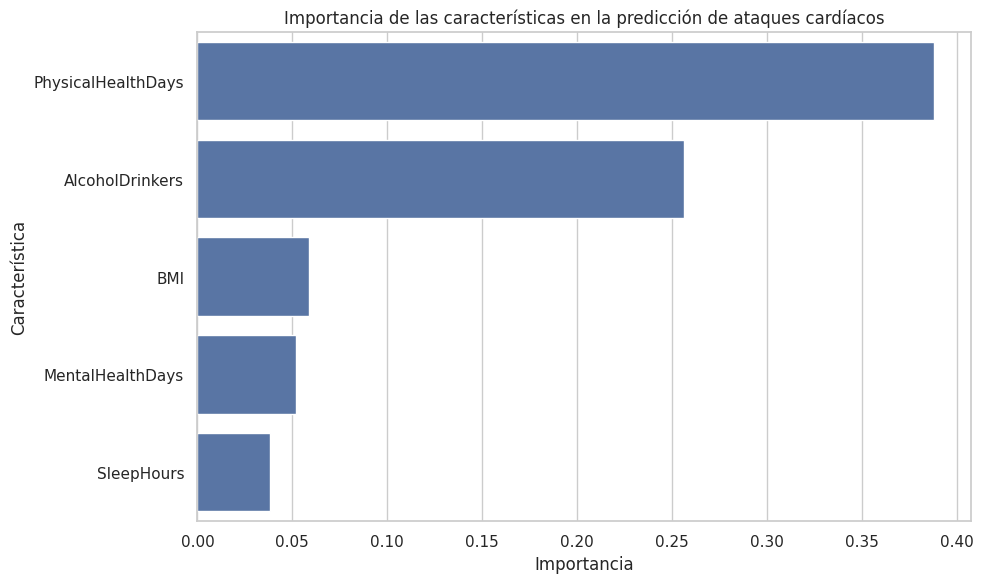

Modelo de Regresión Logística aplicado y evaluado con éxito.


In [ ]:



# Preparar los datos
features = ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'BMI', 'AlcoholDrinkers']
df['AlcoholDrinkers'] = df['AlcoholDrinkers'].map({'Yes': 1, 'No': 0})
X = df[features]
y = df['HadHeartAttack'].map({'Yes': 1, 'No': 0})

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de Regresión Logística
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred = model.predict(X_test_scaled)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('\
Classification Report:')
print(classification_report(y_test, y_pred))

# Visualizar la importancia de las características
feature_importance = pd.DataFrame({'feature': features, 'importance': abs(model.coef_[0])})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Importancia de las características en la predicción de ataques cardíacos')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()

In [ ]:


# Select features and target
features = ['BMI', 'SleepHours', 'AlcoholDrinkers', 'PhysicalHealthDays', 'MentalHealthDays']
target = 'HadHeartAttack'

# Split the data
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create preprocessor
numeric_features = ['BMI', 'SleepHours', 'PhysicalHealthDays', 'MentalHealthDays']
categorical_features = ['AlcoholDrinkers']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse=False), categorical_features)
    ])

# Create pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced'))
])

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('Done')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

          No       0.96      0.70      0.81     46573
         Yes       0.09      0.53      0.16      2632

    accuracy                           0.69     49205
   macro avg       0.53      0.61      0.48     49205
weighted avg       0.92      0.69      0.78     49205

Confusion Matrix:
[[32806 13767]
 [ 1249  1383]]
Done


Accuracy con SMOTE: 0.6847068387359008
ROC AUC con SMOTE: 0.6574066943440168
Classification Report con SMOTE:
              precision    recall  f1-score   support

           0       0.96      0.69      0.81     46573
           1       0.09      0.53      0.15      2632

    accuracy                           0.68     49205
   macro avg       0.53      0.61      0.48     49205
weighted avg       0.92      0.68      0.77     49205



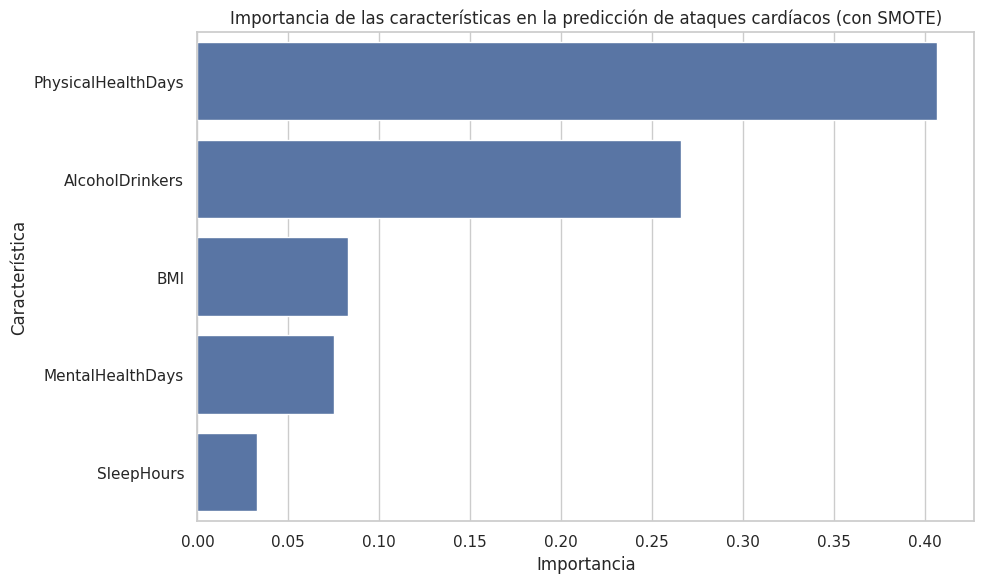

Modelo de Regresión Logística mejorado aplicado y evaluado con éxito.


In [ ]:
# Preparar los datos
features = ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'BMI', 'AlcoholDrinkers']
df['AlcoholDrinkers'] = df['AlcoholDrinkers'].map({'Yes': 1, 'No': 0})
X = df[features]
y = df['HadHeartAttack'].map({'Yes': 1, 'No': 0})

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Entrenar el modelo con datos balanceados
model_smote = LogisticRegression(random_state=42, class_weight='balanced')
model_smote.fit(X_train_smote, y_train_smote)

# Hacer predicciones
y_pred_smote = model_smote.predict(X_test_scaled)

# Evaluar el modelo
accuracy_smote = accuracy_score(y_test, y_pred_smote)
roc_auc_smote = roc_auc_score(y_test, model_smote.predict_proba(X_test_scaled)[:, 1])

print('Accuracy con SMOTE:', accuracy_smote)
print('ROC AUC con SMOTE:', roc_auc_smote)
print('\
Classification Report con SMOTE:')
print(classification_report(y_test, y_pred_smote))

# Visualizar la importancia de las características
feature_importance = pd.DataFrame({'feature': features, 'importance': abs(model_smote.coef_[0])})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Importancia de las características en la predicción de ataques cardíacos (con SMOTE)')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()



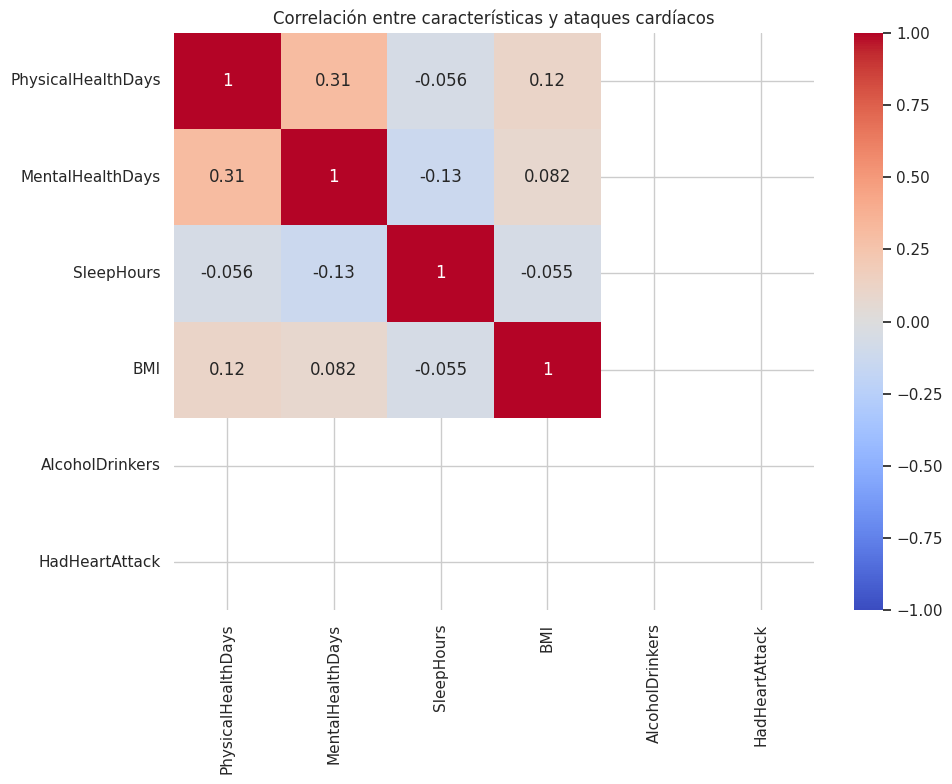

Estadísticas descriptivas para las características más relevantes:
       PhysicalHealthDays  MentalHealthDays     SleepHours            BMI  \
count       246022.000000     246022.000000  246022.000000  246022.000000   
mean             4.119026          4.167140       7.021331      28.668136   
std              8.405844          8.102687       1.440681       6.513973   
min              0.000000          0.000000       1.000000      12.020000   
25%              0.000000          0.000000       6.000000      24.270000   
50%              0.000000          0.000000       7.000000      27.460000   
75%              3.000000          4.000000       8.000000      31.890000   
max             30.000000         30.000000      24.000000      97.650000   

       AlcoholDrinkers  HadHeartAttack  
count              0.0             0.0  
mean               NaN             NaN  
std                NaN             NaN  
min                NaN             NaN  
25%                NaN            

In [ ]:
# Preparar los datos
features = ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'BMI', 'AlcoholDrinkers']
df['AlcoholDrinkers'] = df['AlcoholDrinkers'].map({'Yes': 1, 'No': 0})
df['HadHeartAttack'] = df['HadHeartAttack'].map({'Yes': 1, 'No': 0})

# Calcular la correlación
correlation = df[features + ['HadHeartAttack']].corr()

# Crear un mapa de calor de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlación entre características y ataques cardíacos')
plt.tight_layout()
plt.show()

# Imprimir estadísticas descriptivas
print('Estadísticas descriptivas para las características más relevantes:')
print(df[features + ['HadHeartAttack']].describe())

print('Análisis de correlación y estadísticas descriptivas completado.')

In [ ]:
RaceEthnicityCategory

In [ ]:
# Mapeo de valores de RaceEthnicityCategory a valores numéricos
df['RaceEthnicityCategory'] = df['RaceEthnicityCategory'].map({
    'White only, Non-Hispanic': 0,
    'Black only, Non-Hispanic': 1,
    'Other race only, Non-Hispanic': 2,
    'Multiracial, Non-Hispanic': 3,
    'Hispanic': 4
})


In [ ]:
df['PhysicalActivities'] = df['PhysicalActivities'].map({'Yes': 1, 'No': 0})
df['Sex'] = df['Sex'].map({'Male': 1, 'Female': 0})
df['HadDiabetes'] = df['HadDiabetes'].map({'Yes': 1, 'No': 0})


Accuracy con SMOTE: 0.6779189106798089
ROC AUC con SMOTE: 0.7011983246616726
Classification Report con SMOTE:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     46573
           1       0.10      0.60      0.17      2632

    accuracy                           0.68     49205
   macro avg       0.53      0.64      0.48     49205
weighted avg       0.92      0.68      0.77     49205



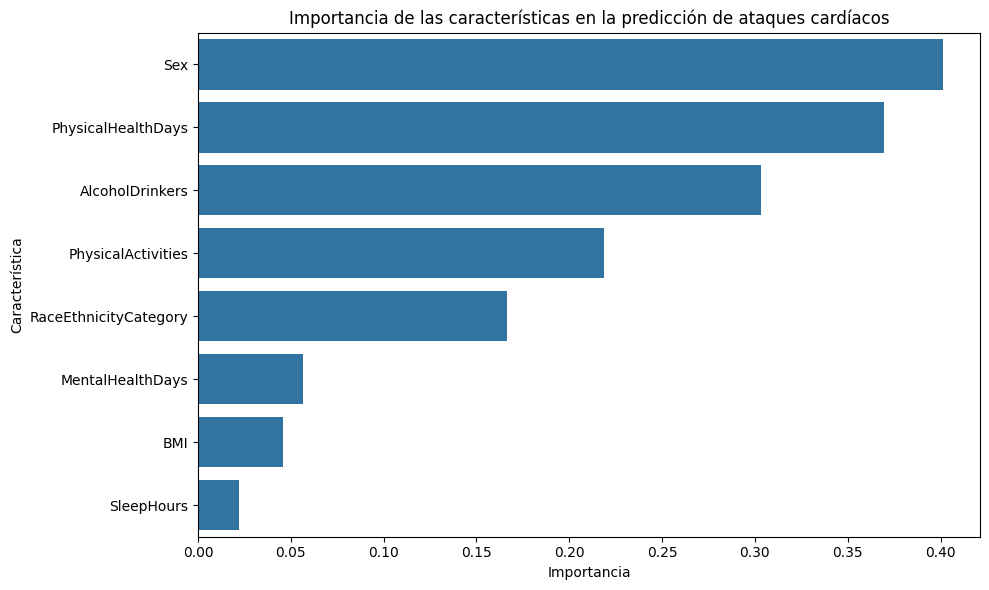

In [ ]:
# Preparar los datos
features = ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'BMI', 'AlcoholDrinkers', 'RaceEthnicityCategory', 'PhysicalActivities', 'Sex']
df['AlcoholDrinkers'] = df['AlcoholDrinkers'].map({'Yes': 1, 'No': 0})
X = df[features]
y = df['HadHeartAttack'].map({'Yes': 1, 'No': 0})

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Entrenar el modelo con datos balanceados
model_smote = LogisticRegression(random_state=42, class_weight='balanced')
model_smote.fit(X_train_smote, y_train_smote)

# Hacer predicciones
y_pred_smote = model_smote.predict(X_test_scaled)

# Evaluar el modelo
accuracy_smote = accuracy_score(y_test, y_pred_smote)
roc_auc_smote = roc_auc_score(y_test, model_smote.predict_proba(X_test_scaled)[:, 1])

print('Accuracy con SMOTE:', accuracy_smote)
print('ROC AUC con SMOTE:', roc_auc_smote)
print('\
Classification Report con SMOTE:')
print(classification_report(y_test, y_pred_smote))

# Visualizar la importancia de las características
feature_importance = pd.DataFrame({'feature': features, 'importance': abs(model_smote.coef_[0])})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Importancia de las características en la predicción de ataques cardíacos')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()



Accuracy: 0.8887511431765065
ROC AUC: 0.5940272777964613
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     46573
           1       0.07      0.09      0.08      2632

    accuracy                           0.89     49205
   macro avg       0.51      0.51      0.51     49205
weighted avg       0.90      0.89      0.89     49205



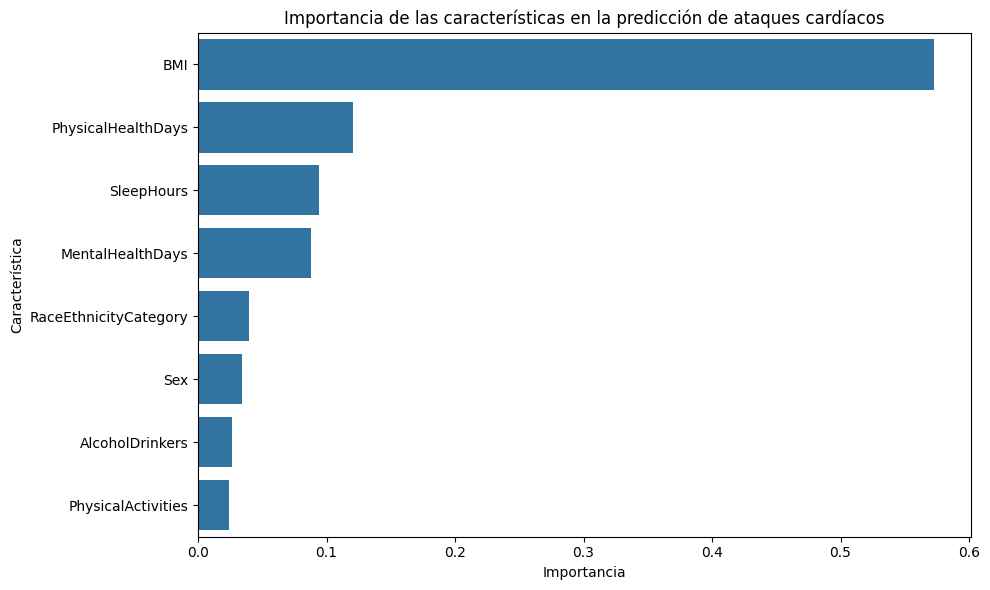

In [ ]:
# Preparar los datos
features = ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'BMI', 'AlcoholDrinkers', 'RaceEthnicityCategory', 'PhysicalActivities', 'Sex']
df['AlcoholDrinkers'] = df['AlcoholDrinkers'].map({'Yes': 1, 'No': 0})
X = df[features]
y = df['HadHeartAttack'].map({'Yes': 1, 'No': 0})

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline con SimpleImputer, StandardScaler y RandomForestClassifier
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Puedes cambiar la estrategia según tus necesidades
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])

print('Accuracy:', accuracy)
print('ROC AUC:', roc_auc)
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Visualizar la importancia de las características
if hasattr(pipeline.named_steps['classifier'], 'feature_importances_'):
    feature_importance = pd.DataFrame({'feature': features, 'importance': pipeline.named_steps['classifier'].feature_importances_})
    feature_importance = feature_importance.sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance)
    plt.title('Importancia de las características en la predicción de ataques cardíacos')
    plt.xlabel('Importancia')
    plt.ylabel('Característica')
    plt.tight_layout()
    plt.show()





In [ ]:
# Preparar los datos
features = ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'BMI', 'AlcoholDrinkers', 'RaceEthnicityCategory', 'PhysicalActivities', 'Sex']
df['AlcoholDrinkers'] = df['AlcoholDrinkers'].map({'Yes': 1, 'No': 0})
X = df[features]
y = df['HadHeartAttack'].map({'Yes': 1, 'No': 0})

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Crear y ajustar el pipeline con StandardScaler y LogisticRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42, class_weight='balanced'))
])

# Ajuste de hiperparámetros usando GridSearchCV
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l2'],
    'classifier__solver': ['liblinear']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)

# Mejor modelo
best_model = grid_search.best_estimator_

# Hacer predicciones
y_pred = best_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

print('Accuracy:', accuracy)
print('ROC AUC:', roc_auc)
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Visualizar la importancia de las características (solo si usas un modelo que soporte esto, como Random Forest)
if hasattr(best_model.named_steps['classifier'], 'feature_importances_'):
    feature_importance = pd.DataFrame({'feature': features, 'importance': best_model.named_steps['classifier'].feature_importances_})
    feature_importance = feature_importance.sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance)
    plt.title('Importancia de las características en la predicción de ataques cardíacos')
    plt.xlabel('Importancia')
    plt.ylabel('Característica')
    plt.tight_layout()
    plt.show()


Accuracy: 0.6926328625139722
ROC AUC: 0.6856478442804143
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     46573
           1       0.10      0.57      0.17      2632

    accuracy                           0.69     49205
   macro avg       0.53      0.64      0.49     49205
weighted avg       0.92      0.69      0.78     49205



In [ ]:
# Ver los valores únicos de la columna RaceEthnicityCategory
unique_values = df['RaceEthnicityCategory'].unique()
print(unique_values)


['White only, Non-Hispanic' 'Black only, Non-Hispanic'
 'Other race only, Non-Hispanic' 'Multiracial, Non-Hispanic' 'Hispanic']
